In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns

In [2]:
datafile = "https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv"
df = pd.read_csv(datafile)
df.drop(columns=['INCKEY','COLDETKEY','LOCATION','EXCEPTRSNCODE','EXCEPTRSNDESC','SEVERITYDESC','HITPARKEDCAR','SDOT_COLDESC','ST_COLDESC','CROSSWALKKEY','SPEEDING','INATTENTIONIND'],inplace=True)

df['dayofweek']=pd.to_datetime(df['INCDATE']).dt.dayofweek
df['date_time']=pd.to_datetime(df['INCDTTM'])
df['hour']=df['date_time'].dt.hour

df.drop(columns=['INCDATE','INCDTTM'],inplace = True)
df.drop(columns=['SEVERITYCODE.1'], inplace = True)
df['year']=df['date_time'].dt.year
df['year'].unique()

df.dropna(subset=['WEATHER','ROADCOND','LIGHTCOND','UNDERINFL'],inplace=True)
df["UNDERINFL"].replace({"0":'N',"1":"Y"},inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print(df.shape)
print(df.columns)

(189337, 27)
Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'REPORTNO', 'STATUS', 'ADDRTYPE',
       'INTKEY', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT',
       'VEHCOUNT', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'UNDERINFL', 'WEATHER',
       'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'ST_COLCODE',
       'SEGLANEKEY', 'dayofweek', 'date_time', 'hour', 'year'],
      dtype='object')


!conda install seaborn

### Dependent variables
    SEVERITYCODE  
    COLLISIONTYPE  
	PERSONCOUNT
    VEHCOUNT
    PEDCOUNT
	PEDCYLCOUNT
	
	
### Independent variables:
    hour
	dayofweek
	weather
    roadcond
    lightcond
    underinfl
    X
	Y

In [4]:
df_ml = df[["WEATHER","ROADCOND","LIGHTCOND","UNDERINFL","hour","dayofweek","SEVERITYCODE","COLLISIONTYPE","PERSONCOUNT","VEHCOUNT","PEDCOUNT","PEDCYLCOUNT","X","Y"]]
df_ml.isnull().sum()
df_ml.dropna(inplace=True)

df_ml["WEATHER"].replace({"Other":'Unknown weather'},inplace=True)
df_ml["WEATHER"].replace({"Unknown":'Unknown weather'},inplace=True)
df_ml["ROADCOND"].replace({"Other":'Unknown road'},inplace=True)
df_ml["ROADCOND"].replace({"Unknown":'Unknown road'},inplace=True)
df_ml["LIGHTCOND"].replace({"Other":'Unknown light'},inplace=True)
df_ml["LIGHTCOND"].replace({"Unknown":'Unknown light'},inplace=True)

df_ml.columns

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Index(['WEATHER', 'ROADCOND', 'LIGHTCOND', 'UNDERINFL', 'hour', 'dayofweek',
       'SEVERITYCODE', 'COLLISIONTYPE', 'PERSONCOUNT', 'VEHCOUNT', 'PEDCOUNT',
       'PEDCYLCOUNT', 'X', 'Y'],
      dtype='object')

In [5]:
df_ml["UNDERINFL"].replace({"N":'0',"Y":"1"},inplace=True)
X_data = df_ml[['WEATHER', 'ROADCOND', 'LIGHTCOND', 'UNDERINFL', 'hour', 'dayofweek','X','Y']]
X_data.shape

(184146, 8)

In [6]:
X_data = pd.concat([X_data, pd.get_dummies(X_data['WEATHER'])], axis=1)
X_data = pd.concat([X_data, pd.get_dummies(X_data['ROADCOND'])], axis=1)
X_data = pd.concat([X_data, pd.get_dummies(X_data['LIGHTCOND'])], axis=1)
X_data.drop(columns = ['WEATHER','ROADCOND','LIGHTCOND'],inplace=True)

In [7]:
print(X_data.columns)
print(X_data.shape)

Index(['UNDERINFL', 'hour', 'dayofweek', 'X', 'Y', 'Blowing Sand/Dirt',
       'Clear', 'Fog/Smog/Smoke', 'Overcast', 'Partly Cloudy', 'Raining',
       'Severe Crosswind', 'Sleet/Hail/Freezing Rain', 'Snowing',
       'Unknown weather', 'Dry', 'Ice', 'Oil', 'Sand/Mud/Dirt', 'Snow/Slush',
       'Standing Water', 'Unknown road', 'Wet', 'Dark - No Street Lights',
       'Dark - Street Lights Off', 'Dark - Street Lights On',
       'Dark - Unknown Lighting', 'Dawn', 'Daylight', 'Dusk', 'Unknown light'],
      dtype='object')
(184146, 31)


In [8]:
Y_data = df_ml[['SEVERITYCODE', 'COLLISIONTYPE', 'PERSONCOUNT', 'VEHCOUNT', 'PEDCOUNT','PEDCYLCOUNT']]
print(Y_data.columns)
print(Y_data.shape)

Index(['SEVERITYCODE', 'COLLISIONTYPE', 'PERSONCOUNT', 'VEHCOUNT', 'PEDCOUNT',
       'PEDCYLCOUNT'],
      dtype='object')
(184146, 6)


#### Normalize X data

In [9]:
X_data = preprocessing.StandardScaler().fit(X_data).transform(X_data)
X_data[0:3]

array([[-0.22479764,  0.36576435, -0.49054241,  0.24493534,  1.48702883,
        -0.01631453, -1.20203207, -0.05488258,  2.4073442 , -0.00521086,
        -0.4584378 , -0.01141702, -0.02466948, -0.06961054, -0.29354724,
        -1.3988196 , -0.08006736, -0.01696756, -0.01849965, -0.07329593,
        -0.02354178, -0.28581643,  1.7329919 , -0.08905709, -0.07909991,
        -0.58747174, -0.00772909, -0.11542239,  0.78886189, -0.17972508,
        -0.27103912],
       [-0.22479764,  0.94327363, -0.49054241, -0.55943642,  0.49144063,
        -0.01631453, -1.20203207, -0.05488258, -0.41539552, -0.00521086,
         2.18132101, -0.01141702, -0.02466948, -0.06961054, -0.29354724,
        -1.3988196 , -0.08006736, -0.01696756, -0.01849965, -0.07329593,
        -0.02354178, -0.28581643,  1.7329919 , -0.08905709, -0.07909991,
         1.70220954, -0.00772909, -0.11542239, -1.26764902, -0.17972508,
        -0.27103912],
       [-0.22479764, -0.21174494,  0.0295662 , -0.13455274, -0.2076694 ,
       

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size = 0.15, random_state=1)

In [11]:
print(Y_train.columns)
print(Y_train.shape)
print(Y_test.shape)

Index(['SEVERITYCODE', 'COLLISIONTYPE', 'PERSONCOUNT', 'VEHCOUNT', 'PEDCOUNT',
       'PEDCYLCOUNT'],
      dtype='object')
(156524, 6)
(27622, 6)


## Decision Tree

### Decition Tree Depth = 10; all responses except collision type

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

tree = DecisionTreeClassifier(criterion="entropy",max_depth=10)
tree.fit(X_train, Y_train[['SEVERITYCODE', 'PERSONCOUNT', 'VEHCOUNT', 'PEDCOUNT','PEDCYLCOUNT']])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [19]:
Y_test_pred = tree.predict(X_test)
Y_test_pred = pd.DataFrame(Y_test_pred)
Y_test_pred.columns = ['SEVERITYCODE', 'PERSONCOUNT', 'VEHCOUNT', 'PEDCOUNT','PEDCYLCOUNT']

Y_train_pred = tree.predict(X_train)
Y_train_pred = pd.DataFrame(Y_train_pred)
Y_train_pred.columns = ['SEVERITYCODE', 'PERSONCOUNT', 'VEHCOUNT', 'PEDCOUNT','PEDCYLCOUNT']

In [20]:
Y_train_pred.head()

,SEVERITYCODE,PERSONCOUNT,VEHCOUNT,PEDCOUNT,PEDCYLCOUNT
0,1,2,2,0,0
1,1,2,2,0,0
2,1,2,2,0,0
3,1,2,2,0,0
4,1,2,2,0,0


In [21]:
print("training set accuracy of SEVERITYCODE = ", 
      metrics.accuracy_score(Y_train['SEVERITYCODE'], Y_train_pred['SEVERITYCODE']))
print("training set accuracy of PERSONCOUNT = " ,
      metrics.accuracy_score(Y_train['PERSONCOUNT'], Y_train_pred['PERSONCOUNT']))
print("training set accuracy of VEHCOUNT = " ,
      metrics.accuracy_score(Y_train['VEHCOUNT'], Y_train_pred['VEHCOUNT']))
print("training set accuracy of PEDCOUNT = " ,
      metrics.accuracy_score(Y_train['PEDCOUNT'], Y_train_pred['PEDCOUNT']))
print("training set accuracy of PEDCYLCOUNT = ",       
    metrics.accuracy_score(Y_train['PEDCYLCOUNT'], Y_train_pred['PEDCYLCOUNT']))

training set accuracy of SEVERITYCODE =  0.6973882599473563
training set accuracy of PERSONCOUNT =  0.5901778640975186
training set accuracy of VEHCOUNT =  0.7840714523012445
training set accuracy of PEDCOUNT =  0.9628363701413202
training set accuracy of PEDCYLCOUNT =  0.9707073675602463


In [22]:
print("testing set accuracy of SEVERITYCODE = ", 
      metrics.accuracy_score(Y_test['SEVERITYCODE'], Y_test_pred['SEVERITYCODE']))
print("testing set accuracy of PERSONCOUNT = " ,
      metrics.accuracy_score(Y_test['PERSONCOUNT'], Y_test_pred['PERSONCOUNT']))
print("testing set accuracy of VEHCOUNT = " ,
      metrics.accuracy_score(Y_test['VEHCOUNT'], Y_test_pred['VEHCOUNT']))
print("testing set accuracy of PEDCOUNT = " ,
      metrics.accuracy_score(Y_test['PEDCOUNT'], Y_test_pred['PEDCOUNT']))
print("testing set accuracy of PEDCYLCOUNT = ",       
      metrics.accuracy_score(Y_test['PEDCYLCOUNT'], Y_test_pred['PEDCYLCOUNT']))

testing set accuracy of SEVERITYCODE =  0.697016870610383
testing set accuracy of PERSONCOUNT =  0.5846426761277242
testing set accuracy of VEHCOUNT =  0.7749257837955253
testing set accuracy of PEDCOUNT =  0.9628556947360799
testing set accuracy of PEDCYLCOUNT =  0.969879081891246


### Decition Tree Depth = 35; all responses except collision type

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

tree = DecisionTreeClassifier(criterion="entropy",max_depth=35)
tree.fit(X_train, Y_train[['SEVERITYCODE', 'PERSONCOUNT', 'VEHCOUNT', 'PEDCOUNT','PEDCYLCOUNT']])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=35,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [63]:
Y_test_pred = tree.predict(X_test)
Y_test_pred = pd.DataFrame(Y_test_pred)
Y_test_pred.columns = ['SEVERITYCODE', 'PERSONCOUNT', 'VEHCOUNT', 'PEDCOUNT','PEDCYLCOUNT']

Y_train_pred = tree.predict(X_train)
Y_train_pred = pd.DataFrame(Y_train_pred)
Y_train_pred.columns = ['SEVERITYCODE', 'PERSONCOUNT', 'VEHCOUNT', 'PEDCOUNT','PEDCYLCOUNT']

In [64]:
print("training set accuracy of SEVERITYCODE= ", 
      metrics.accuracy_score(Y_train['SEVERITYCODE'], Y_train_pred['SEVERITYCODE']))
print("training set accuracy of PERSONCOUNT = " ,
      metrics.accuracy_score(Y_train['PERSONCOUNT'], Y_train_pred['PERSONCOUNT']))
print("training set accuracy of    VEHCOUNT = " ,
      metrics.accuracy_score(Y_train['VEHCOUNT'], Y_train_pred['VEHCOUNT']))
print("training set accuracy of    PEDCOUNT = " ,
      metrics.accuracy_score(Y_train['PEDCOUNT'], Y_train_pred['PEDCOUNT']))
print("training set accuracy of PEDCYLCOUNT = ",       
    metrics.accuracy_score(Y_train['PEDCYLCOUNT'], Y_train_pred['PEDCYLCOUNT']))

training set accuracy of SEVERITYCODE=  0.9858488155171092
training set accuracy of PERSONCOUNT =  0.9791278014873118
training set accuracy of    VEHCOUNT =  0.9895607063453528
training set accuracy of    PEDCOUNT =  0.9977575323911988
training set accuracy of PEDCYLCOUNT =  0.998421967238251


In [65]:
print("training set jaccard score of SEVERITYCODE = ", 
      metrics.jaccard_score(Y_train['SEVERITYCODE'], Y_train_pred['SEVERITYCODE'],average = 'weighted'))
print("training set jaccard score of  PERSONCOUNT = " ,
      metrics.jaccard_score(Y_train['PERSONCOUNT'], Y_train_pred['PERSONCOUNT'],average = 'weighted'))
print("training set jaccard score of     VEHCOUNT = " ,
      metrics.jaccard_score(Y_train['VEHCOUNT'], Y_train_pred['VEHCOUNT'],average = 'weighted'))
print("training set jaccard score of     PEDCOUNT = " ,
      metrics.jaccard_score(Y_train['PEDCOUNT'], Y_train_pred['PEDCOUNT'],average = 'weighted'))
print("training set jaccard score of  PEDCYLCOUNT = ",       
      metrics.jaccard_score(Y_train['PEDCYLCOUNT'], Y_train_pred['PEDCYLCOUNT'],average = 'weighted'))

training set jaccard score of SEVERITYCODE =  0.9719986979393471
training set jaccard score of  PERSONCOUNT =  0.9590194735051717
training set jaccard score of     VEHCOUNT =  0.9793971709713898
training set jaccard score of     PEDCOUNT =  0.9955209992941169
training set jaccard score of  PEDCYLCOUNT =  0.9968474808814961


In [66]:
print("training set f1 score of SEVERITYCODE = ", 
      metrics.f1_score(Y_train['SEVERITYCODE'], Y_train_pred['SEVERITYCODE'],average = 'weighted'))
print("training set f1 score of  PERSONCOUNT = " ,
      metrics.f1_score(Y_train['PERSONCOUNT'], Y_train_pred['PERSONCOUNT'],average = 'weighted'))
print("training set f1 score of     VEHCOUNT = " ,
      metrics.f1_score(Y_train['VEHCOUNT'], Y_train_pred['VEHCOUNT'],average = 'weighted'))
print("training set f1 score of     PEDCOUNT = " ,
      metrics.f1_score(Y_train['PEDCOUNT'], Y_train_pred['PEDCOUNT'],average = 'weighted'))
print("training set f1 score of  PEDCYLCOUNT = ",       
      metrics.f1_score(Y_train['PEDCYLCOUNT'], Y_train_pred['PEDCYLCOUNT'],average = 'weighted'))

training set f1 score of SEVERITYCODE =  0.9857619004890966
training set f1 score of  PERSONCOUNT =  0.9789756544125592
training set f1 score of     VEHCOUNT =  0.9895169513703236
training set f1 score of     PEDCOUNT =  0.9977240403652875
training set f1 score of  PEDCYLCOUNT =  0.9984009224584082


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [67]:
print("testing set accuracy of SEVERITYCODE = ", 
      metrics.accuracy_score(Y_test['SEVERITYCODE'], Y_test_pred['SEVERITYCODE']))
print("testing set accuracy of  PERSONCOUNT = " ,
      metrics.accuracy_score(Y_test['PERSONCOUNT'], Y_test_pred['PERSONCOUNT']))
print("testing set accuracy of     VEHCOUNT = " ,
      metrics.accuracy_score(Y_test['VEHCOUNT'], Y_test_pred['VEHCOUNT']))
print("testing set accuracy of     PEDCOUNT = " ,
      metrics.accuracy_score(Y_test['PEDCOUNT'], Y_test_pred['PEDCOUNT']))
print("testing set accuracy of  PEDCYLCOUNT = ",       
      metrics.accuracy_score(Y_test['PEDCYLCOUNT'], Y_test_pred['PEDCYLCOUNT']))

testing set accuracy of SEVERITYCODE =  0.6023821591485048
testing set accuracy of  PERSONCOUNT =  0.41336615741075955
testing set accuracy of     VEHCOUNT =  0.6433277822025921
testing set accuracy of     PEDCOUNT =  0.9297661284483383
testing set accuracy of  PEDCYLCOUNT =  0.9454782419810296


In [68]:
print("testing set jaccard score of SEVERITYCODE = ", 
      metrics.jaccard_score(Y_test['SEVERITYCODE'], Y_test_pred['SEVERITYCODE'],average = 'weighted'))
print("testing set jaccard score of  PERSONCOUNT = " ,
      metrics.jaccard_score(Y_test['PERSONCOUNT'], Y_test_pred['PERSONCOUNT'],average = 'weighted'))
print("testing set jaccard score of     VEHCOUNT = " ,
      metrics.jaccard_score(Y_test['VEHCOUNT'], Y_test_pred['VEHCOUNT'],average = 'weighted'))
print("testing set jaccard score of     PEDCOUNT = " ,
      metrics.jaccard_score(Y_test['PEDCOUNT'], Y_test_pred['PEDCOUNT'],average = 'weighted'))
print("testing set jaccard score of  PEDCYLCOUNT = ",       
      metrics.jaccard_score(Y_test['PEDCYLCOUNT'], Y_test_pred['PEDCYLCOUNT'],average = 'weighted'))

testing set jaccard score of SEVERITYCODE =  0.45193687956000633
testing set jaccard score of  PERSONCOUNT =  0.2900359437269787
testing set jaccard score of     VEHCOUNT =  0.5249947941164339
testing set jaccard score of     PEDCOUNT =  0.89722499503521
testing set jaccard score of  PEDCYLCOUNT =  0.9185918069872571


In [69]:
print("testing set f1 score of SEVERITYCODE = ", 
      metrics.f1_score(Y_test['SEVERITYCODE'], Y_test_pred['SEVERITYCODE'],average = 'weighted'))
print("testing set f1 score of  PERSONCOUNT = " ,
      metrics.f1_score(Y_test['PERSONCOUNT'], Y_test_pred['PERSONCOUNT'],average = 'weighted'))
print("testing set f1 score of     VEHCOUNT = " ,
      metrics.f1_score(Y_test['VEHCOUNT'], Y_test_pred['VEHCOUNT'],average = 'weighted'))
print("testing set f1 score of     PEDCOUNT = " ,
      metrics.f1_score(Y_test['PEDCOUNT'], Y_test_pred['PEDCOUNT'],average = 'weighted'))
print("testing set f1 score of  PEDCYLCOUNT = ",       
      metrics.f1_score(Y_test['PEDCYLCOUNT'], Y_test_pred['PEDCYLCOUNT'],average = 'weighted'))

testing set f1 score of SEVERITYCODE =  0.6051726066694819
testing set f1 score of  PERSONCOUNT =  0.41676397816722627
testing set f1 score of     VEHCOUNT =  0.6483323137426962
testing set f1 score of     PEDCOUNT =  0.9313088849343218
testing set f1 score of  PEDCYLCOUNT =  0.9459191621273009


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


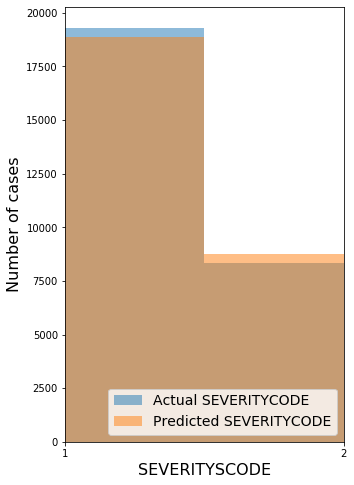

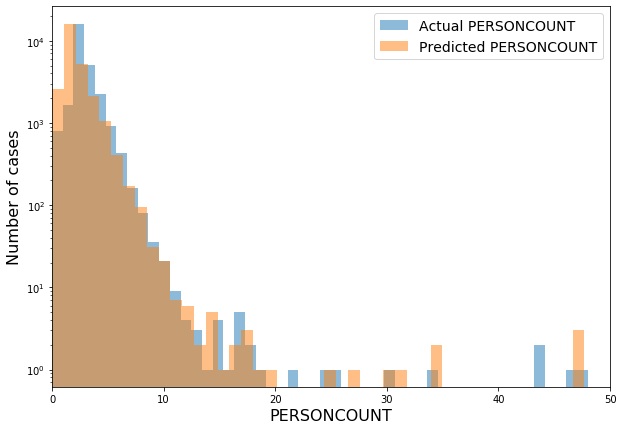

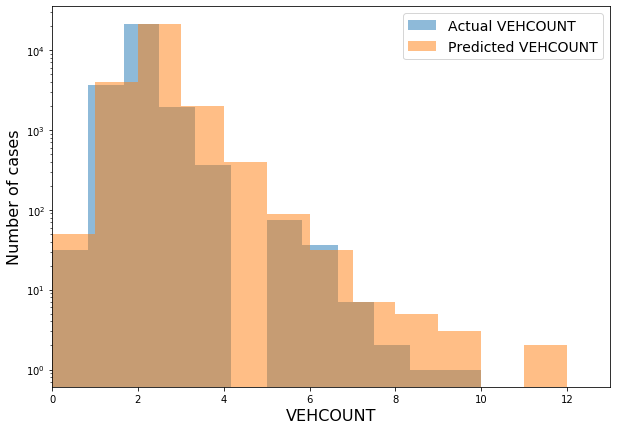

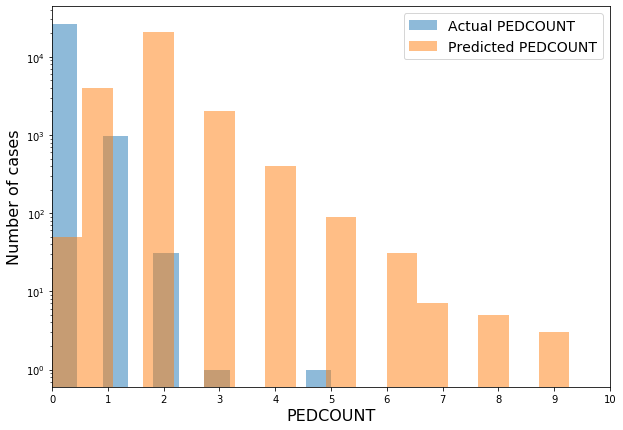

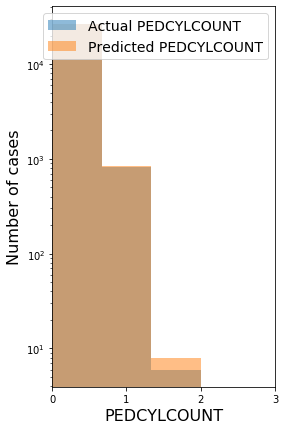

In [70]:
plt.figure(figsize = (5,8))
ax = plt.hist(Y_test['SEVERITYCODE'], bins=2, alpha =0.5, label = 'Actual SEVERITYCODE')
ax = plt.hist(Y_test_pred['SEVERITYCODE'], bins=2, alpha =0.5, label = 'Predicted SEVERITYCODE')
ax = plt.xlabel("SEVERITYSCODE",fontsize=16)
ax = plt.ylabel("Number of cases",fontsize=16)
ax = plt.legend(fontsize=14,loc='lower right')
ax = plt.xlim(1,2)
ax = plt.xticks(np.arange(1,3,1))

plt.figure(figsize = (10,7))
ax = plt.hist(Y_test['PERSONCOUNT'], bins=50, alpha =0.5,  label = 'Actual PERSONCOUNT')
ax = plt.hist(Y_test_pred['PERSONCOUNT'], bins=50, alpha =0.5, label = 'Predicted PERSONCOUNT')
ax = plt.xlabel("PERSONCOUNT",fontsize=16)
ax = plt.ylabel("Number of cases",fontsize=16)
ax = plt.yscale('log')
ax = plt.legend(fontsize=14)
ax = plt.xlim(0,50)
ax = plt.xticks(np.arange(0,51,10))

plt.figure(figsize = (10,7))
ax = plt.hist(Y_test['VEHCOUNT'], bins=12, alpha =0.5, label = 'Actual VEHCOUNT')
ax = plt.hist(Y_test_pred['VEHCOUNT'], bins=12, alpha =0.5, label = 'Predicted VEHCOUNT')
ax = plt.xlabel("VEHCOUNT",fontsize=16)
ax = plt.ylabel("Number of cases",fontsize=16)
ax = plt.legend(fontsize=14)
ax = plt.yscale('log')
ax = plt.xlim(0,13)
ax = plt.xticks(np.arange(0,14,2))


plt.figure(figsize = (10,7))
ax = plt.hist(Y_test['PEDCOUNT'], bins=11, alpha =0.5,label = 'Actual PEDCOUNT')
ax = plt.hist(Y_test_pred['VEHCOUNT'], bins=22, alpha =0.5, label = 'Predicted PEDCOUNT')
ax = plt.xlabel("PEDCOUNT",fontsize=16)
ax = plt.ylabel("Number of cases",fontsize=16)
ax = plt.legend(fontsize=14)
ax = plt.yscale('log')
ax = plt.xlim(1,10)
ax = plt.xticks(np.arange(0,11,1))

plt.figure(figsize = (4,7))
ax = plt.hist(Y_test['PEDCYLCOUNT'], bins=3, alpha =0.5, label = 'Actual PEDCYLCOUNT ')
ax = plt.hist(Y_test_pred['PEDCYLCOUNT'], bins=3, alpha =0.5,label = 'Predicted PEDCYLCOUNT')
ax = plt.xlabel("PEDCYLCOUNT",fontsize=16)
ax = plt.ylabel("Number of cases",fontsize=16)
ax = plt.legend(fontsize=14)
ax = plt.legend(fontsize=14)
ax = plt.yscale('log')
ax = plt.xlim(0,3)
ax = plt.xticks(np.arange(0,4,1))

### Decition Tree Depth = 50; collision type

In [85]:
tree2 = DecisionTreeClassifier(criterion="entropy",max_depth=35)
tree2.fit(X_train, Y_train['COLLISIONTYPE'])

Y_test_pred2 = tree2.predict(X_test)
Y_train_pred2 = tree2.predict(X_train)

print("training set accuracy score of COLLISIONTYPE = ", 
      metrics.accuracy_score(Y_train['COLLISIONTYPE'], Y_train_pred2))
print("training set jaccard score of  COLLISIONTYPE = ", 
      metrics.jaccard_score(Y_train['COLLISIONTYPE'], Y_train_pred2,average='weighted'))
print("training set f1 score of       COLLISIONTYPE = ", 
      metrics.f1_score(Y_train['COLLISIONTYPE'], Y_train_pred2,average='weighted'))

print("testing set accuracy score of COLLISIONTYPE = ", 
      metrics.accuracy_score(Y_test['COLLISIONTYPE'], Y_test_pred2))
print("testing set jaccard score of  COLLISIONTYPE = ", 
      metrics.jaccard_score(Y_test['COLLISIONTYPE'], Y_test_pred2,average='weighted'))
print("testing set f1 score of       COLLISIONTYPE = ", 
      metrics.f1_score(Y_test['COLLISIONTYPE'], Y_test_pred2,average='weighted'))

training set accuracy score of COLLISIONTYPE =  0.9786230865554164
training set jaccard score of  COLLISIONTYPE =  0.9581690065271312
training set f1 score of       COLLISIONTYPE =  0.978542498992824
testing set accuracy score of COLLISIONTYPE =  0.33980160741437987
testing set jaccard score of  COLLISIONTYPE =  0.21562863192159923
testing set f1 score of       COLLISIONTYPE =  0.3415246046564216


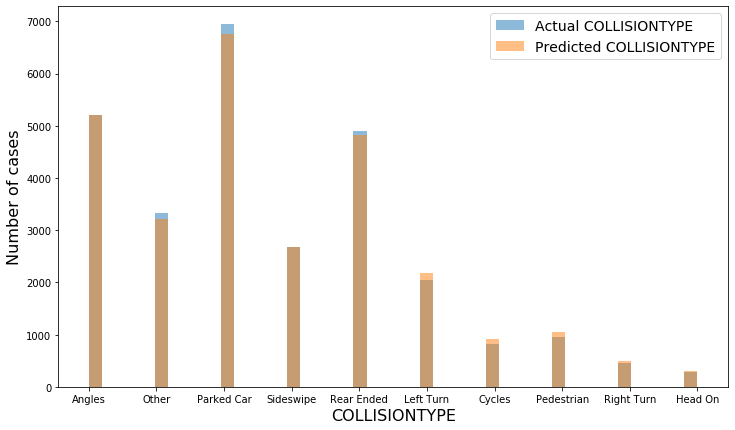

In [83]:
plt.figure(figsize = (12,7))
ax = plt.hist(Y_test['COLLISIONTYPE'], bins='auto', alpha =0.5, label = 'Actual COLLISIONTYPE')
ax = plt.hist(Y_test_pred2, bins='auto', alpha =0.5, label = 'Predicted COLLISIONTYPE')
ax = plt.xlabel("COLLISIONTYPE",fontsize=16)
ax = plt.ylabel("Number of cases",fontsize=16)
ax = plt.legend(fontsize=14)

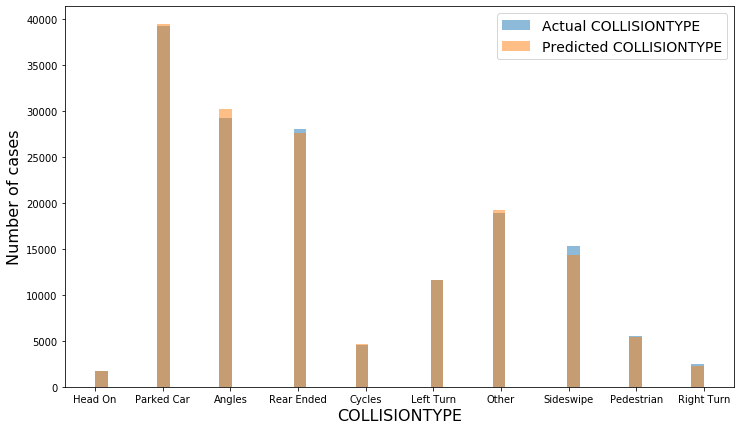

In [84]:
plt.figure(figsize = (12,7))
ax = plt.hist(Y_train['COLLISIONTYPE'], bins='auto', alpha =0.5, label = 'Actual COLLISIONTYPE')
ax = plt.hist(Y_train_pred2, bins='auto', alpha =0.5, label = 'Predicted COLLISIONTYPE')
ax = plt.xlabel("COLLISIONTYPE",fontsize=16)
ax = plt.ylabel("Number of cases",fontsize=16)
ax = plt.legend(fontsize=14)

### Decition Tree Depth = 10; all other responses

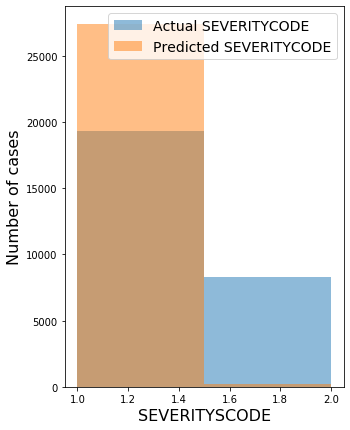

In [24]:
plt.figure(figsize = (5,7))
ax = plt.hist(Y_test['SEVERITYCODE'], bins=2, alpha =0.5, label = 'Actual SEVERITYCODE')
ax = plt.hist(Y_test_pred['SEVERITYCODE'], bins=2, alpha =0.5, label = 'Predicted SEVERITYCODE')
ax = plt.xlabel("SEVERITYSCODE",fontsize=16)
ax = plt.ylabel("Number of cases",fontsize=16)
ax = plt.legend(fontsize=14)

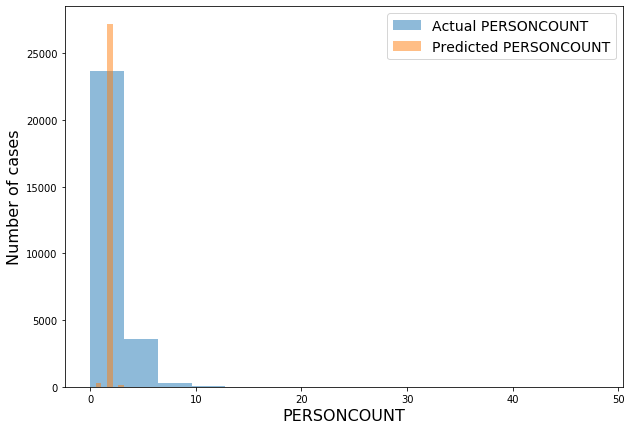

In [25]:
plt.figure(figsize = (10,7))
ax = plt.hist(Y_test['PERSONCOUNT'], bins=15, alpha =0.5, label = 'Actual PERSONCOUNT')
ax = plt.hist(Y_test_pred['PERSONCOUNT'], bins=15, alpha =0.5, label = 'Predicted PERSONCOUNT')
ax = plt.xlabel("PERSONCOUNT",fontsize=16)
ax = plt.ylabel("Number of cases",fontsize=16)
ax = plt.legend(fontsize=14)

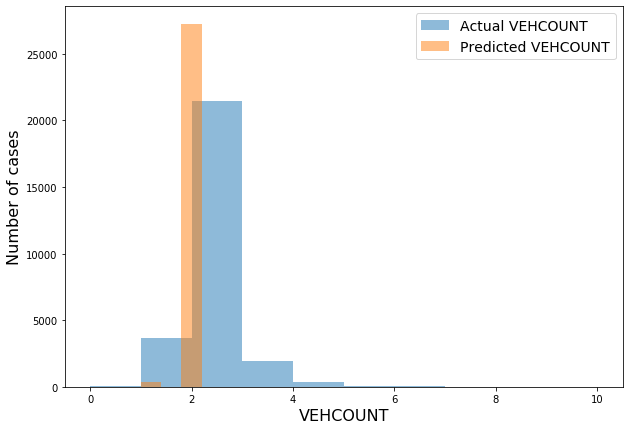

In [26]:
plt.figure(figsize = (10,7))
ax = plt.hist(Y_test['VEHCOUNT'], bins=10, alpha =0.5, label = 'Actual VEHCOUNT')
ax = plt.hist(Y_test_pred['VEHCOUNT'], bins=10, alpha =0.5, label = 'Predicted VEHCOUNT')
ax = plt.xlabel("VEHCOUNT",fontsize=16)
ax = plt.ylabel("Number of cases",fontsize=16)
ax = plt.legend(fontsize=14)

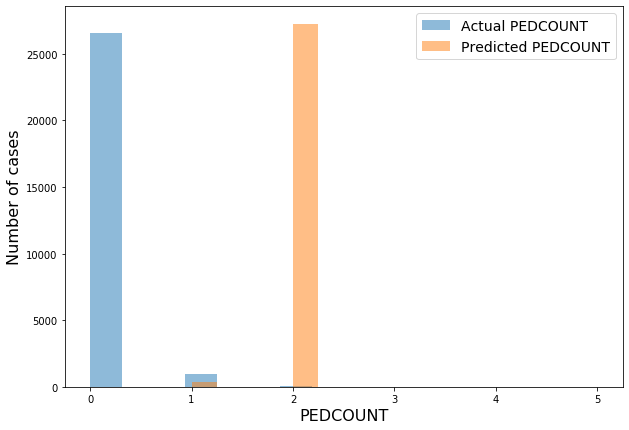

In [29]:
plt.figure(figsize = (10,7))
ax = plt.hist(Y_test['PEDCOUNT'], bins='auto', alpha =0.5, label = 'Actual PEDCOUNT')
ax = plt.hist(Y_test_pred['VEHCOUNT'], bins='auto', alpha =0.5, label = 'Predicted PEDCOUNT')
ax = plt.xlabel("PEDCOUNT",fontsize=16)
ax = plt.ylabel("Number of cases",fontsize=16)
ax = plt.legend(fontsize=14)

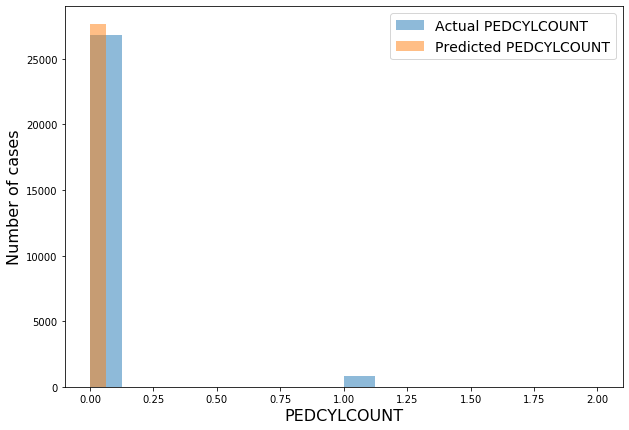

In [41]:
plt.figure(figsize = (10,7))
ax = plt.hist(Y_test['PEDCYLCOUNT'], bins='auto', alpha =0.5, label = 'Actual PEDCYLCOUNT ')
ax = plt.hist(Y_test_pred['PEDCYLCOUNT'], bins='auto', alpha =0.5, label = 'Predicted PEDCYLCOUNT')
ax = plt.xlabel("PEDCYLCOUNT",fontsize=16)
ax = plt.ylabel("Number of cases",fontsize=16)
ax = plt.legend(fontsize=14)

def plot_predict_true(ytest, ypred, title):
    plt.figure(figsize=(8,8))
    ax = plt.scatter(ytest, ypred, s=10)
    ax = plt.xlabel('Actual data', fontsize=16)
    ax = plt.ylabel('Predicted data', fontsize=16)
    ax - plt.title(label = title, loc ='center')

plt.figure(figsize = (10,7))
ax = plt.hist(Y_test['COLLISIONTYPE'], bins=10, alpha =0.5, label = 'Actual COLLISIONTYPE')
ax = plt.hist(Y_test_pred2, bins=10, alpha =0.5, label = 'Predicted COLLISIONTYPE')
ax = plt.xlabel("COLLISIONTYPE",fontsize=16)
ax = plt.ylabel("Number of cases",fontsize=16)
ax = plt.legend(fontsize=14)

## Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

training set accuracy of SEVERITYCODE =  0.6953438450333496
testing set accuracy of SEVERITYCODE =  0.6989356310187532


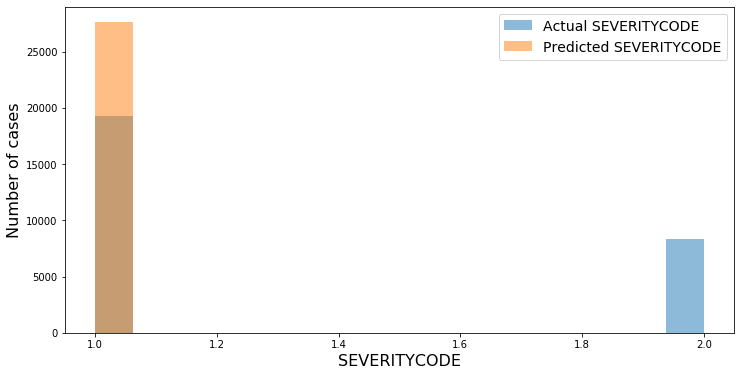

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


training set accuracy of COLLISIONTYPE =  0.28937415348444967
testing set accuracy of COLLISIONTYPE =  0.28477300702338715


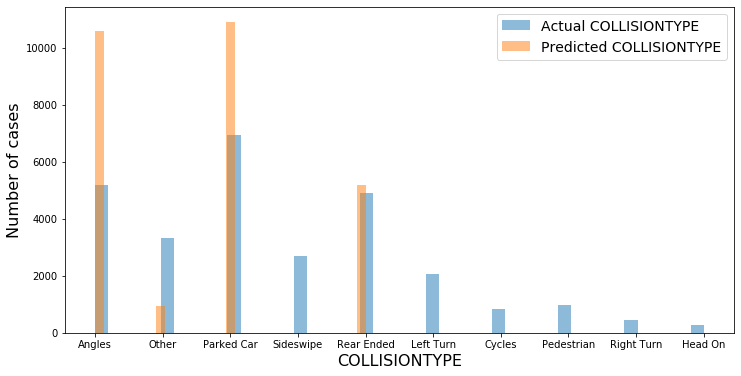

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


training set accuracy of PERSONCOUNT =  0.5862040326084179
testing set accuracy of PERSONCOUNT =  0.5861270002172182


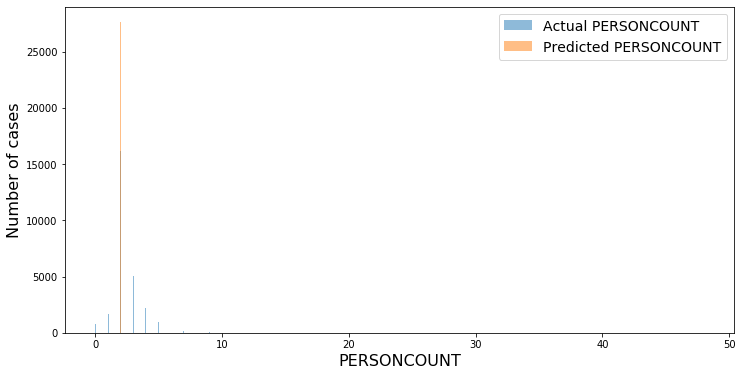

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


training set accuracy of VEHCOUNT =  0.7806278909304644
testing set accuracy of VEHCOUNT =  0.7785098834262545


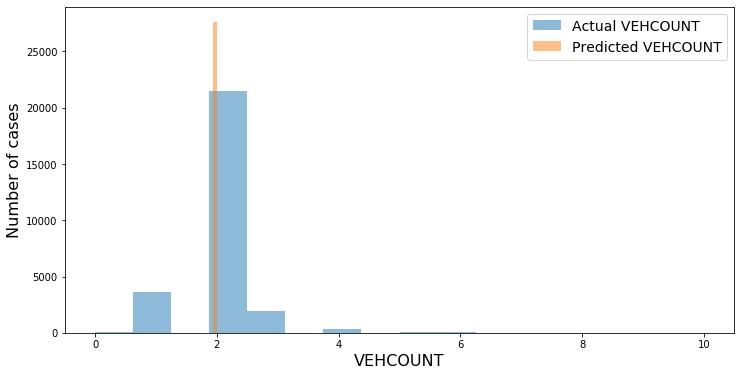

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


training set accuracy of PEDCOUNT =  0.962644706243132
testing set accuracy of PEDCOUNT =  0.9631815219752371


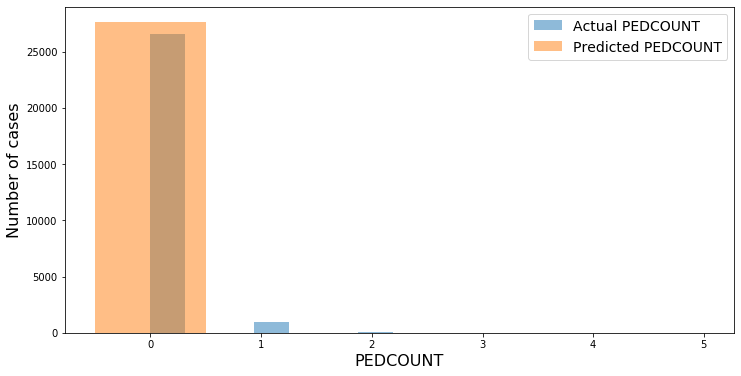

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


training set accuracy of PEDCYLCOUNT =  0.9706818123738212
testing set accuracy of PEDCYLCOUNT =  0.9699152849178191


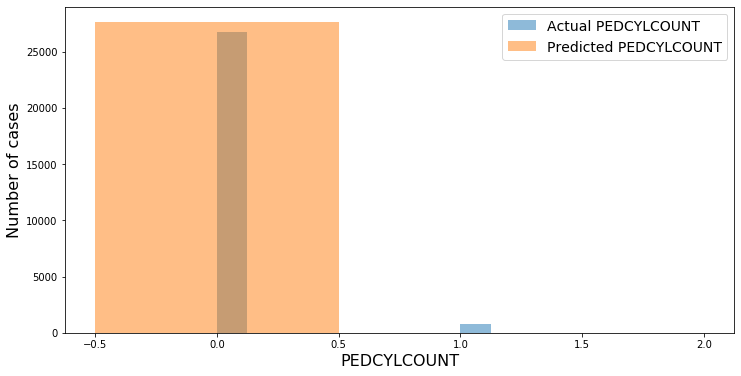

In [43]:
list = ['SEVERITYCODE', 'COLLISIONTYPE', 'PERSONCOUNT', 'VEHCOUNT', 'PEDCOUNT','PEDCYLCOUNT']

for feature_to_predict in list:
    logistreg = LogisticRegression(C=0.1, solver = 'saga').fit(X_train, Y_train[feature_to_predict])
    
    Y_train_pred = logistreg.predict(X_train)
    Y_test_pred = logistreg.predict(X_test)

    print("training set accuracy of "+ feature_to_predict +" = ", 
          metrics.accuracy_score(Y_train[feature_to_predict], Y_train_pred))
    print("testing set accuracy of "+ feature_to_predict +" = ", 
          metrics.accuracy_score(Y_test[feature_to_predict], Y_test_pred))

    plt.figure(figsize = (12,6))
    ax = plt.hist(Y_test[feature_to_predict], bins='auto', alpha =0.5, label = 'Actual '+feature_to_predict)
    ax = plt.hist(Y_test_pred, bins='auto', alpha =0.5, label = 'Predicted '+feature_to_predict)
    ax = plt.xlabel(feature_to_predict,fontsize=16)
    ax = plt.ylabel("Number of cases",fontsize=16)
    ax = plt.legend(fontsize=14)
    plt.show()


## K-Nearest Neighbor

In [44]:
from sklearn.neighbors import KNeighborsClassifier

k_neigh = KNeighborsClassifier(n_neighbors = 5).fit(X_train, Y_train["SEVERITYCODE"])

In [45]:
y_test_pred=k_neigh.predict(X_test)

In [46]:
from sklearn import metrics
print("test set accuracy (k=5) = ", metrics.accuracy_score(Y_test["SEVERITYCODE"],y_test_pred))

test set accuracy (k=5) =  0.6394540583592788


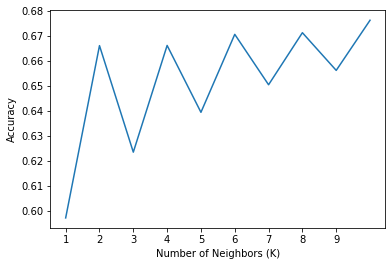

In [47]:
Kf= 10
accuracy_k = np.zeros((Kf))

for i in range (1, Kf+1):
    k_neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,Y_train["SEVERITYCODE"])
    y_test_pred = k_neigh.predict(X_test)
    accuracy_k[i-1]= metrics.accuracy_score(Y_test["SEVERITYCODE"],y_test_pred)

plt.plot(range(1,Kf+1),accuracy_k)
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1,Kf,step=1))
plt.show()

In [57]:
Kf= 20
accuracy_k = np.zeros((Kf))
jaccard_k = np.zeros((Kf))
f1_k = np.zeros((Kf))

for i in range (11, Kf+11):
    k_neighi = KNeighborsClassifier(n_neighbors = i).fit(X_train,Y_train["SEVERITYCODE"])
    y_test_pred = k_neighi.predict(X_test)
    accuracy_k[i-11]= metrics.accuracy_score(Y_test["SEVERITYCODE"],y_test_pred)
    jaccard_k[i-11]= metrics.jaccard_score(Y_test["SEVERITYCODE"],y_test_pred,average = 'weighted')
    f1_k[i-11]= metrics.f1_score(Y_test["SEVERITYCODE"],y_test_pred,average = 'weighted')

print("Accuracy score array (k = 11 to 20): ", accuracy_k)
print("Jaccard score array (k = 11 to 20): ", jaccard_k)
print("F1 score array (k = 11 to 20): ", f1_k)

Accuracy score array (k = 11 to 20):  [0.66443415 0.67793788 0.66689595 0.67992904 0.67048005 0.68137716
 0.67410035 0.68322352 0.67681558 0.68506987 0.67895156 0.68709724
 0.6830425  0.68883499 0.68478025 0.68923322 0.68677141 0.69086236
 0.68738687 0.69187604]
Jaccard score array (k = 11 to 20):  [0.48825713 0.48982176 0.48727247 0.48982012 0.48803182 0.48968503
 0.48926212 0.48985616 0.48941522 0.48984374 0.48948698 0.49097599
 0.49175003 0.492119   0.49209583 0.4914135  0.49287701 0.49231541
 0.49229024 0.49208504]
F1 score array (k = 11 to 20):  [0.61217019 0.60125428 0.60748459 0.59912403 0.60531596 0.59727417
 0.60412278 0.59565837 0.60156941 0.59362886 0.59944491 0.59393225
 0.59999567 0.59457411 0.59889121 0.59257715 0.59846357 0.59280475
 0.59651696 0.59118315]


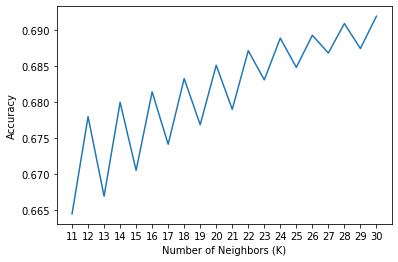

In [60]:
plt.plot(range(11,Kf+11),accuracy_k)
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(np.arange(11,Kf+11,step=1))
plt.show()

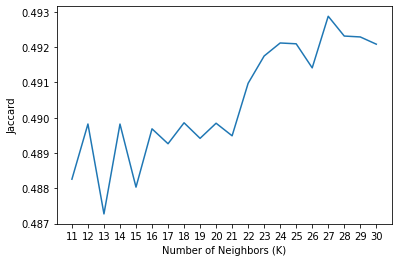

In [61]:
plt.plot(range(11,Kf+11),jaccard_k)
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Jaccard')
plt.xticks(np.arange(11,Kf+11,step=1))
plt.show()

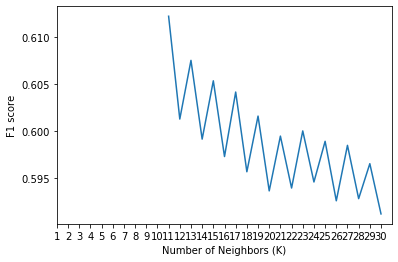

In [62]:
plt.plot(range(11,Kf+11),f1_k)
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('F1 score')
plt.xticks(np.arange(1,Kf+11,step=1))
plt.show()

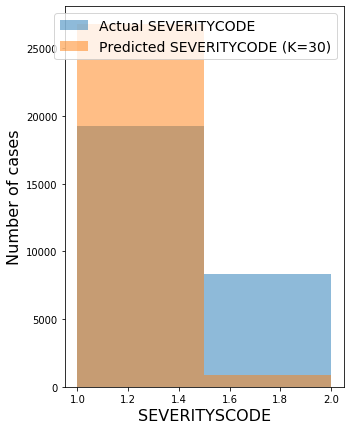

In [63]:
plt.figure(figsize = (5,7))
ax = plt.hist(Y_test['SEVERITYCODE'], bins=2, alpha =0.5, label = 'Actual SEVERITYCODE')
ax = plt.hist(y_test_pred, bins=2, alpha =0.5, label = 'Predicted SEVERITYCODE (K=30)')
ax = plt.xlabel("SEVERITYSCODE",fontsize=16)
ax = plt.ylabel("Number of cases",fontsize=16)
ax = plt.legend(fontsize=14)

In [50]:
k_neigh_2 = KNeighborsClassifier(n_neighbors = 8).fit(X_train, Y_train["COLLISIONTYPE"])

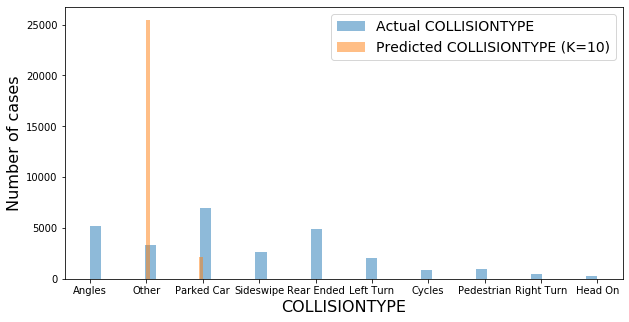

In [51]:
plt.figure(figsize = (10,5))
ax = plt.hist(Y_test['COLLISIONTYPE'], bins='auto', alpha =0.5, label = 'Actual COLLISIONTYPE')
ax = plt.hist(y_test_pred, bins='auto', alpha =0.5, label = 'Predicted COLLISIONTYPE (K=10)')
ax = plt.xlabel("COLLISIONTYPE",fontsize=16)
ax = plt.ylabel("Number of cases",fontsize=16)
ax = plt.legend(fontsize=14)

SEVERITYCODE: 
      training set accuracy score:  0.717001865528609
      training set  Jaccard score:  0.5341601321720152
      training set       f1 score:  0.6535751765018516
       testing set accuracy score:  0.6763449424371878
       testing set  Jaccard score:  0.4900507623247066
       testing set       f1 score:  0.6034411571539048
   


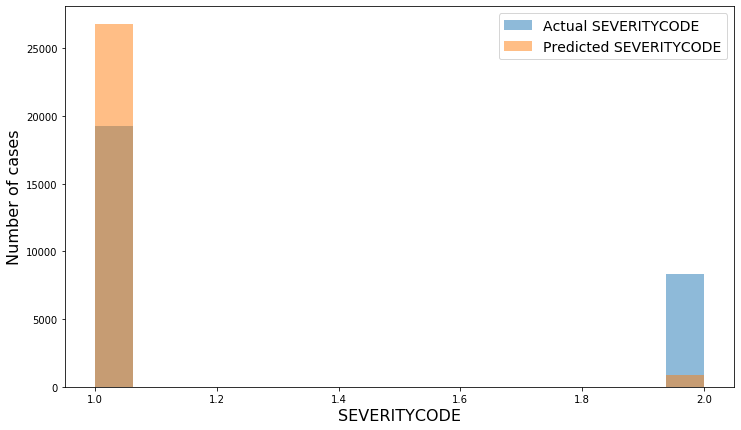

COLLISIONTYPE: 
      training set accuracy score:  0.4243310929953234
      training set  Jaccard score:  0.260181753002147
      training set       f1 score:  0.39993097508479875
       testing set accuracy score:  0.29136195785967706
       testing set  Jaccard score:  0.16376132851869035
       testing set       f1 score:  0.2683943096893167
   


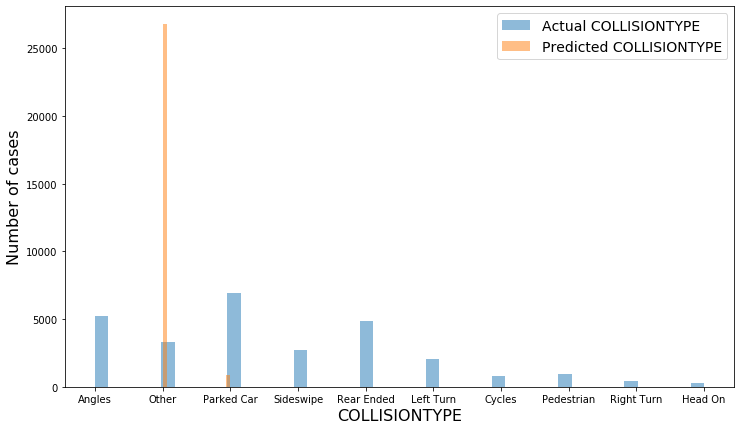

PERSONCOUNT: 
      training set accuracy score:  0.60189491707342
      training set  Jaccard score:  0.3869840876926792
      training set       f1 score:  0.5014721026596104
       testing set accuracy score:  0.5617623633335747
       testing set  Jaccard score:  0.3480283776115318
       testing set       f1 score:  0.45303625551807014
   


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


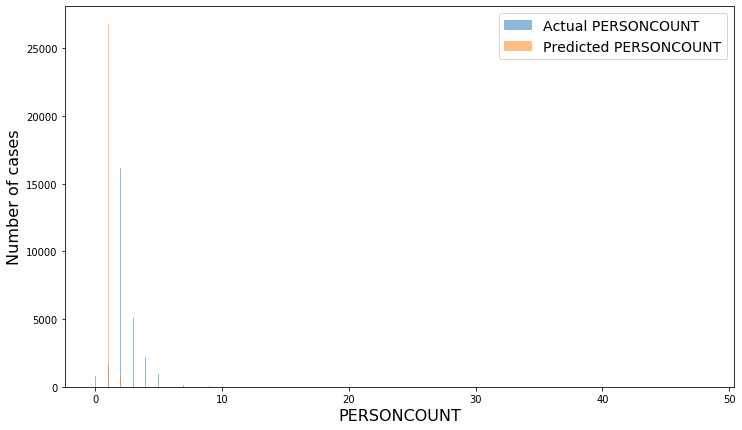

VEHCOUNT: 
      training set accuracy score:  0.785917814520457
      training set  Jaccard score:  0.6282572864783972
      training set       f1 score:  0.7140643182036455
       testing set accuracy score:  0.7699297661284483
       testing set  Jaccard score:  0.6076272262751903
       testing set       f1 score:  0.692785095470544
   


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


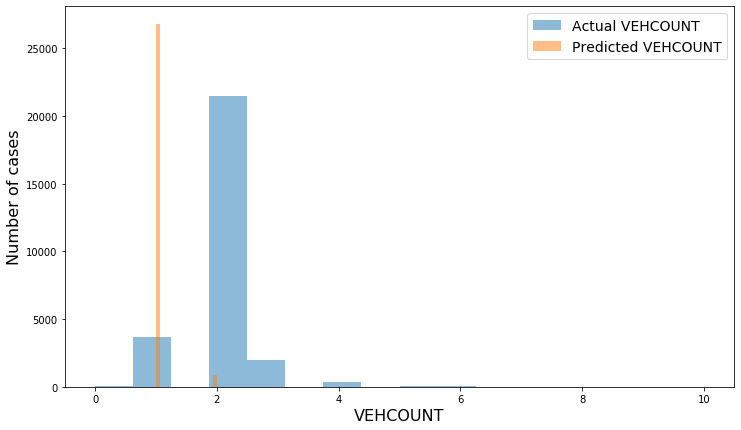

PEDCOUNT: 
      training set accuracy score:  0.9626702614295571
      training set  Jaccard score:  0.9267584345273672
      training set       f1 score:  0.9444268347665393
       testing set accuracy score:  0.9630367098689451
       testing set  Jaccard score:  0.9275791639295954
       testing set       f1 score:  0.9450451530185819
   


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


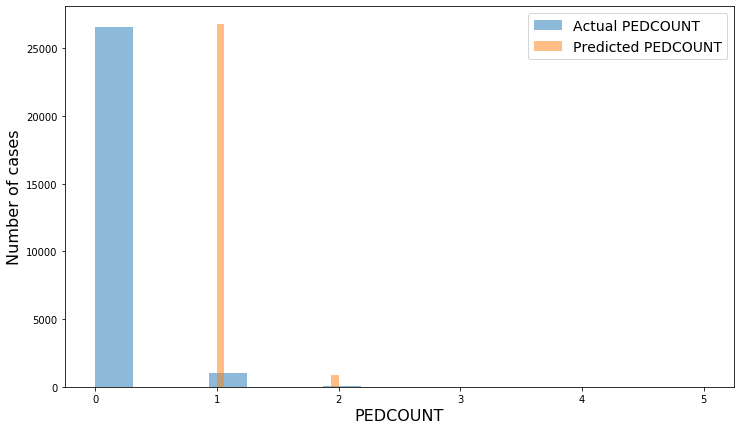

PEDCYLCOUNT: 
      training set accuracy score:  0.9706945899670338
      training set  Jaccard score:  0.9422851729866132
      training set       f1 score:  0.9563483504985776
       testing set accuracy score:  0.9698066758381001
       testing set  Jaccard score:  0.9406303183107139
       testing set       f1 score:  0.955048360682909
   


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


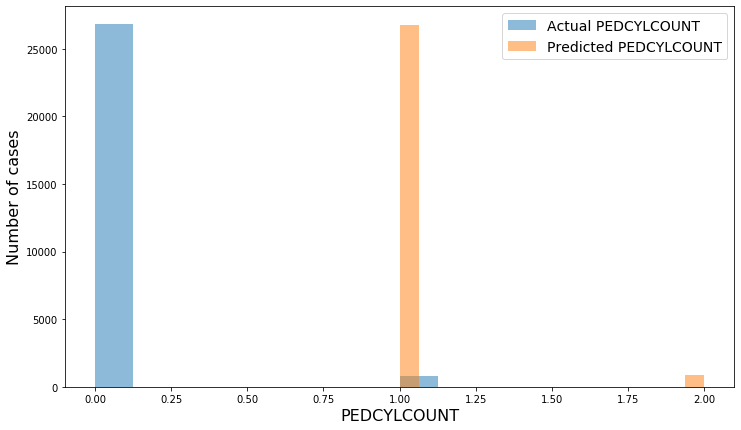

In [64]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score

list = ['SEVERITYCODE', 'COLLISIONTYPE', 'PERSONCOUNT', 'VEHCOUNT', 'PEDCOUNT','PEDCYLCOUNT']

for feature_to_predict in list:
    k_neigh_ = KNeighborsClassifier(n_neighbors = 10).fit(X_train, Y_train[feature_to_predict])
    
    Y_train_pred = k_neigh_.predict(X_train)
    Y_test_pred = k_neigh_.predict(X_test)

    print(feature_to_predict +": ")
    print("      training set accuracy score: ", 
          metrics.accuracy_score(Y_train[feature_to_predict], Y_train_pred))
    print("      training set  Jaccard score: ", 
          metrics.jaccard_score(Y_train[feature_to_predict], Y_train_pred, average = 'weighted'))
    print("      training set       f1 score: ", 
          metrics.f1_score(Y_train[feature_to_predict], Y_train_pred,average = 'weighted'))
    print("       testing set accuracy score: ", 
          metrics.accuracy_score(Y_test[feature_to_predict], Y_test_pred))
    print("       testing set  Jaccard score: ", 
          metrics.jaccard_score(Y_test[feature_to_predict], Y_test_pred, average = 'weighted'))
    print("       testing set       f1 score: ", 
          metrics.f1_score(Y_test[feature_to_predict], Y_test_pred,average = 'weighted'))
    print("   ")
    plt.figure(figsize = (12,7))
    ax = plt.hist(Y_test[feature_to_predict], bins='auto', alpha =0.5, label = 'Actual '+feature_to_predict)
    ax = plt.hist(y_test_pred, bins='auto', alpha =0.5, label = 'Predicted '+feature_to_predict)
    ax = plt.xlabel(feature_to_predict,fontsize=16)
    ax = plt.ylabel("Number of cases",fontsize=16)
    ax = plt.legend(fontsize=14)
    plt.show()
    

## Polynomial Regression

In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

polymodel = PolynomialFeatures(degree=2)
X_train_poly = polymodel.fit_transform(X_train)

In [24]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train_poly, Y_train[['X','Y']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

print ('Coefficients: ', lin_reg.coef_)
print ('Intercept: ',lin_reg.intercept_)

In [25]:
Y_train_pred = lin_reg.predict(X_train_poly)
X_test_poly = polymodel.fit_transform(X_test)
Y_test_pred = lin_reg.predict(X_test_poly)

In [26]:
Y_test_pred = pd.DataFrame(Y_test_pred)
Y_test_pred.columns=['X','Y']

Y_test_pred.head()

,X,Y
0,-122.330063,47.619266
1,-122.330551,47.621268
2,-122.329821,47.618180
3,-122.329847,47.618818
4,-122.331857,47.619611


In [33]:
Y_test_pred.mean()

X    6225.507917
Y   -2046.975700
dtype: float64

plt.figure(figsize = (10,7))
ax = plt.hist(Y_test['X'], bins='auto', alpha =0.5, label = 'Actual X location')
ax = plt.xlabel("X location of test set",fontsize=16)
ax = plt.ylabel("Number of cases",fontsize=16)
ax = plt.legend(fontsize=14)

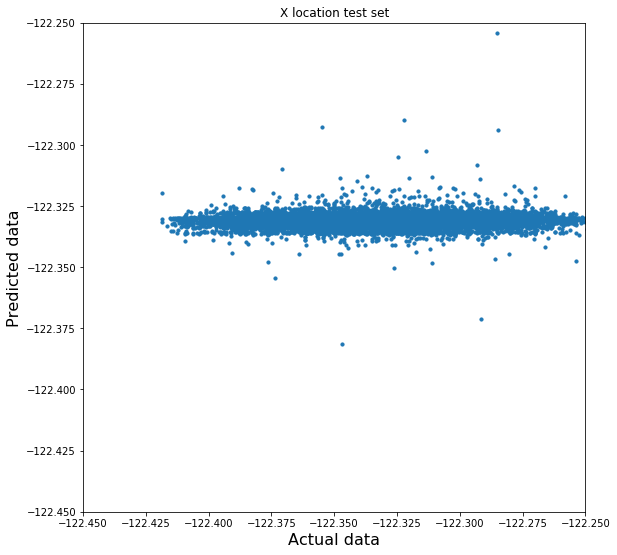

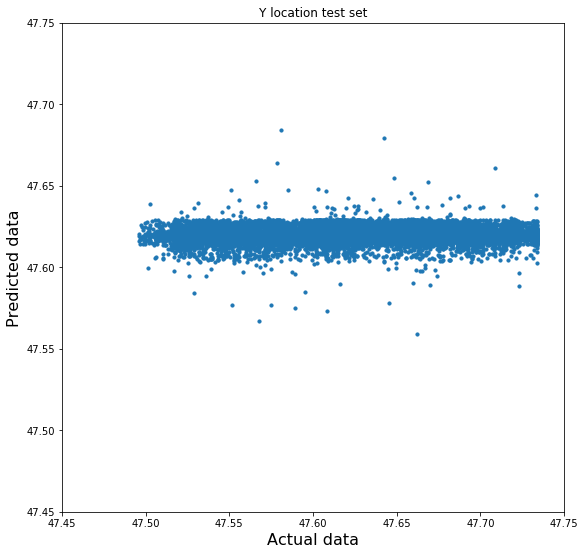

In [27]:
def plot_predict_true(ytest, ypred, name, lim1, lim2):
    plt.figure(figsize=(9,9))
    ax = plt.scatter(ytest, ypred, s=10)
    ax = plt.xlabel('Actual data', fontsize=16)
    ax = plt.ylabel('Predicted data', fontsize=16)
    ax = plt.xlim(lim1,lim2)
    ax = plt.ylim(lim1,lim2)
    ax = plt.title(label = name)
plot_predict_true(Y_test['X'], Y_test_pred['X'], "X location test set", -122.45,-122.25)
plot_predict_true(Y_test['Y'], Y_test_pred['Y'], "Y location test set", 47.45,47.75)

#### Try 3rd order polynomial

In [28]:
polymodel3 = PolynomialFeatures(degree=3)
X_train_poly3 = polymodel3.fit_transform(X_train)
lin_reg3 = linear_model.LinearRegression()
lin_reg3.fit(X_train_poly3, Y_train[['X','Y']])

Y_train_pred3 = lin_reg3.predict(X_train_poly3)
X_test_poly3 = polymodel3.fit_transform(X_test)
Y_test_pred3 = lin_reg3.predict(X_test_poly3)

Y_test_pred3 = pd.DataFrame(Y_test_pred3)
Y_test_pred3.columns=['X','Y']



In [32]:
Y_test_pred3.head()
Y_test_pred3.mean()

X      50.039749
Y    1486.587188
dtype: float64

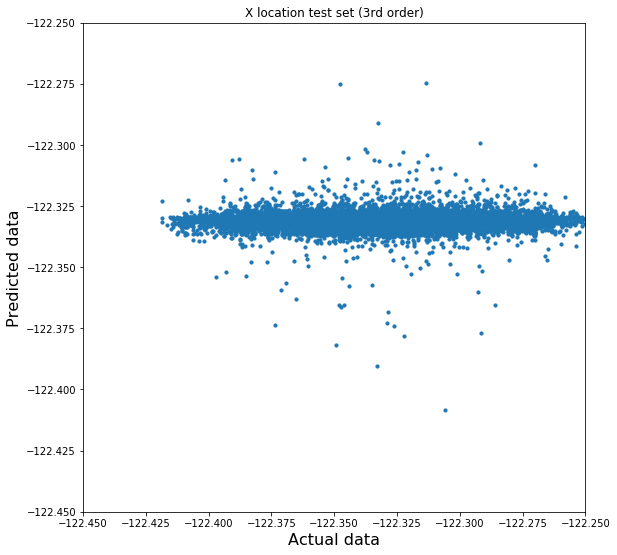

In [34]:
plot_predict_true(Y_test['X'], Y_test_pred3['X'], "X location test set (3rd order)", -122.45,-122.25)


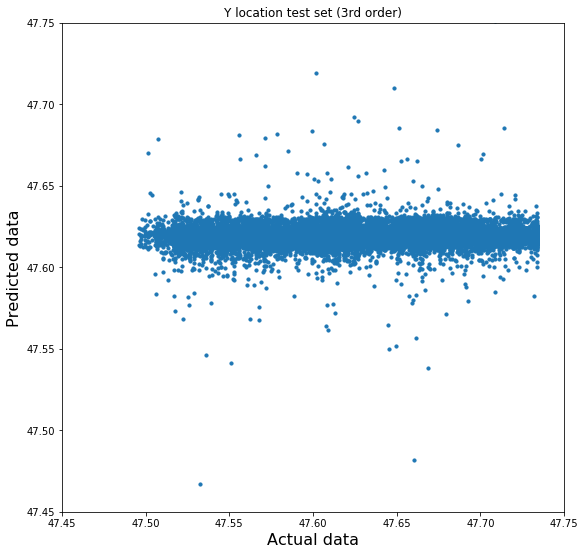

In [35]:
plot_predict_true(Y_test['Y'], Y_test_pred3['Y'], "Y location test set (3rd order)", 47.45,47.75)

#### Retrain location data using dayofweek and hour

In [45]:
X_train[:,1:3]

array([[ 1.23202827,  0.0295662 ],
       [ 0.79889631,  1.58989201],
       [ 0.94327363,  1.06978341],
       ...,
       [-1.65551814,  0.5496748 ],
       [ 1.66516023,  1.58989201],
       [ 0.79889631,  1.06978341]])

In [49]:
polymodel_2= PolynomialFeatures(degree=2)
X_train_2 = polymodel_2.fit_transform(X_train[:,1:3])
lin_reg_2 = linear_model.LinearRegression()
lin_reg_2.fit(X_train_2, Y_train[['X','Y']])

Y_train_pred_2 = lin_reg_2.predict(X_train_2)
X_test_poly_2 = polymodel_2.fit_transform(X_test[:,1:3])
Y_test_pred_2 = lin_reg_2.predict(X_test_poly_2)

Y_test_pred_2 = pd.DataFrame(Y_test_pred_2)
Y_test_pred_2.columns=['X','Y']

In [50]:
Y_test_pred_2.head()
Y_test_pred_2.mean()

X   -122.330500
Y     47.619509
dtype: float64

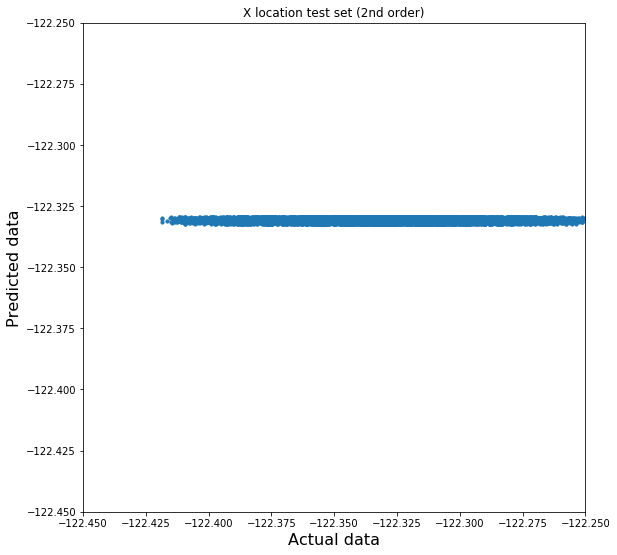

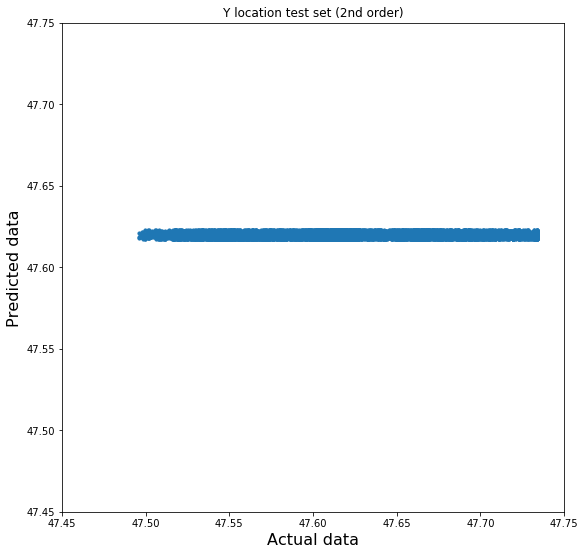

In [51]:
plot_predict_true(Y_test['X'], Y_test_pred_2['X'], "X location test set (2nd order)", -122.45,-122.25)
plot_predict_true(Y_test['Y'], Y_test_pred_2['Y'], "Y location test set (2nd order)", 47.45,47.75)

#### redo using 3rd order

In [53]:
polymodel_3= PolynomialFeatures(degree=3)
X_train_3 = polymodel_3.fit_transform(X_train[:,1:3])
lin_reg_3 = linear_model.LinearRegression()
lin_reg_3.fit(X_train_3, Y_train[['X','Y']])

Y_train_pred_3 = lin_reg_3.predict(X_train_3)
X_test_poly_3 = polymodel_3.fit_transform(X_test[:,1:3])
Y_test_pred_3 = lin_reg_3.predict(X_test_poly_3)

Y_test_pred_3 = pd.DataFrame(Y_test_pred_3)
Y_test_pred_3.columns=['X','Y']

Y_test_pred_3.head()
Y_test_pred_3.mean()

X   -122.330497
Y     47.619543
dtype: float64

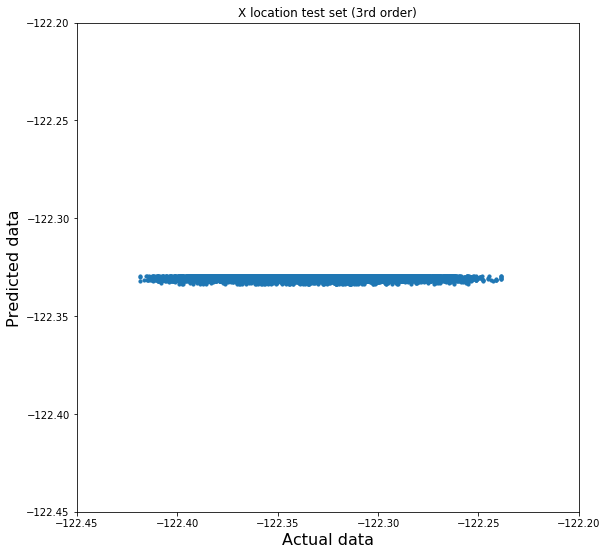

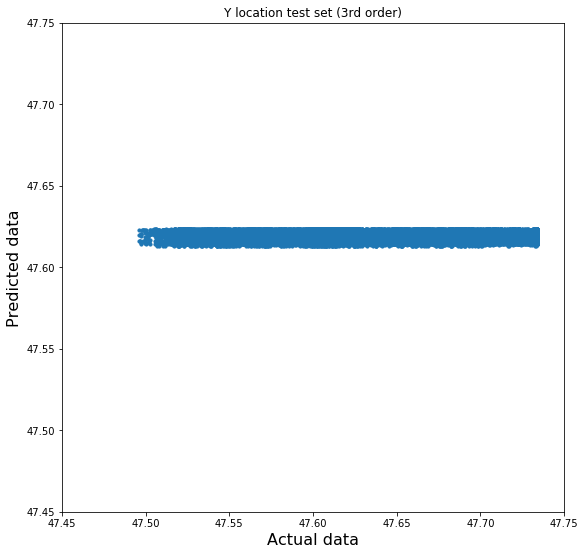

In [56]:
plot_predict_true(Y_test['X'], Y_test_pred_3['X'], "X location test set (3rd order)", -122.45,-122.2)
plot_predict_true(Y_test['Y'], Y_test_pred_3['Y'], "Y location test set (3rd order)", 47.45,47.75)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max

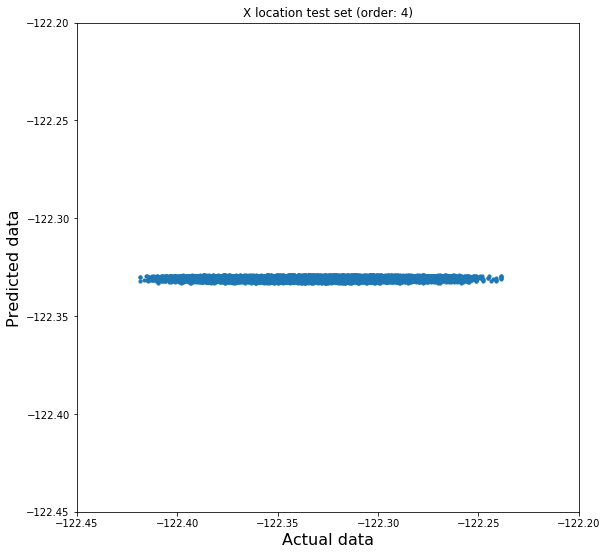

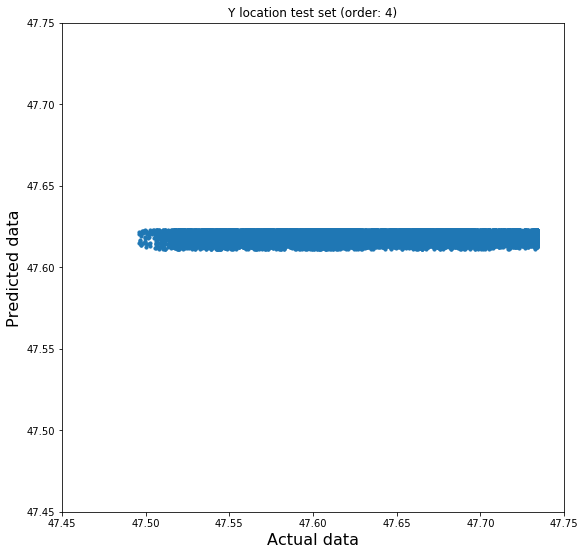

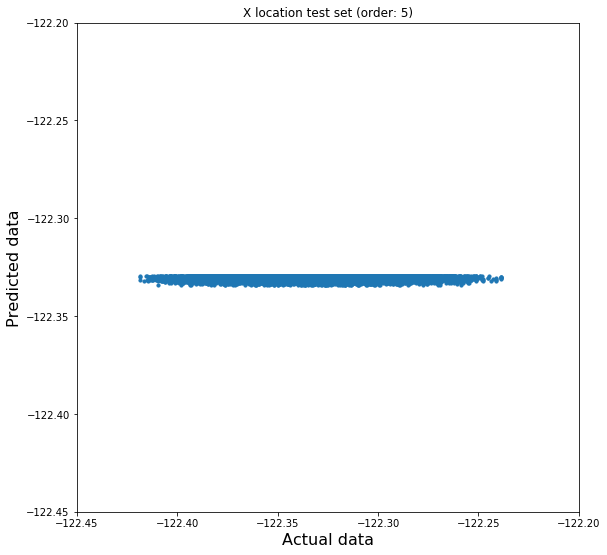

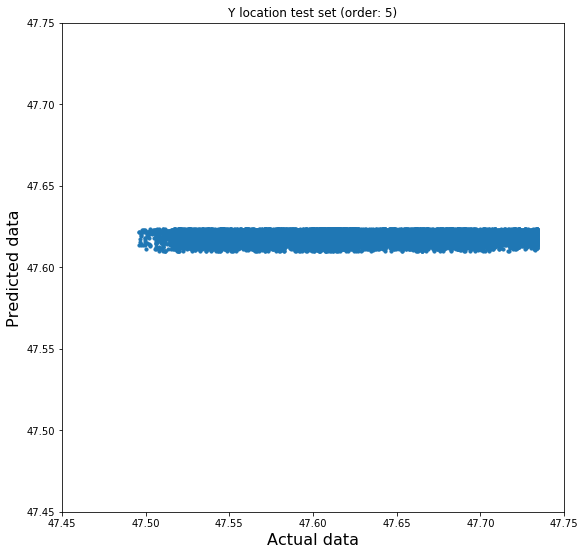

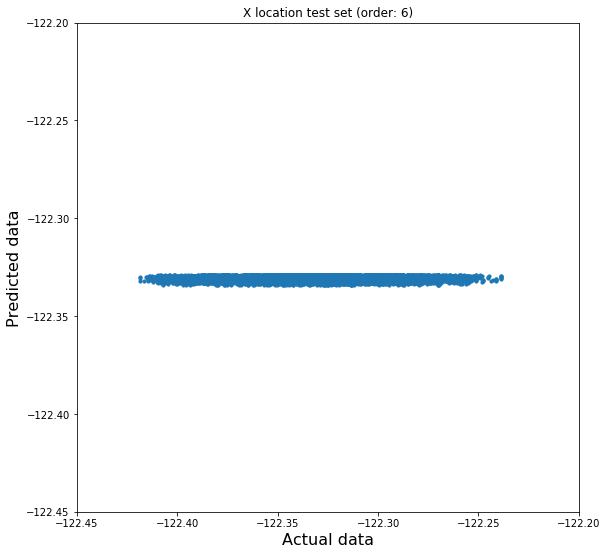

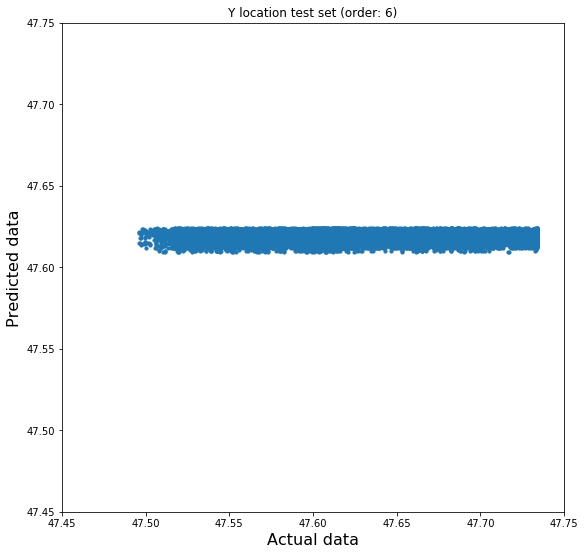

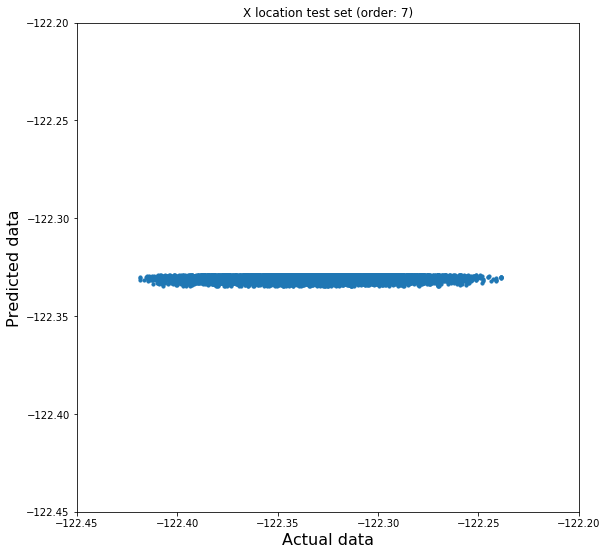

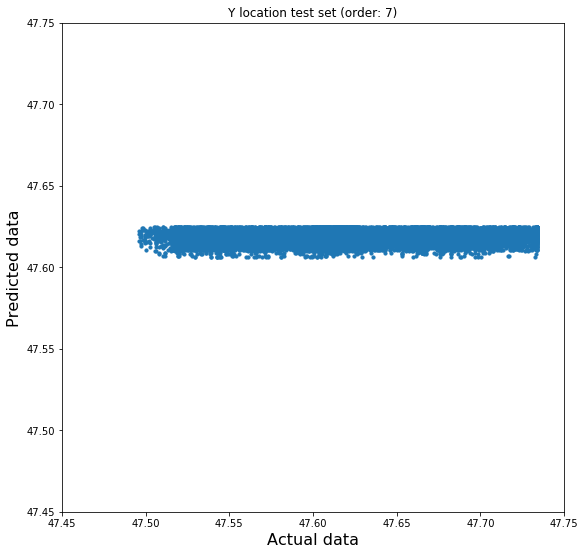

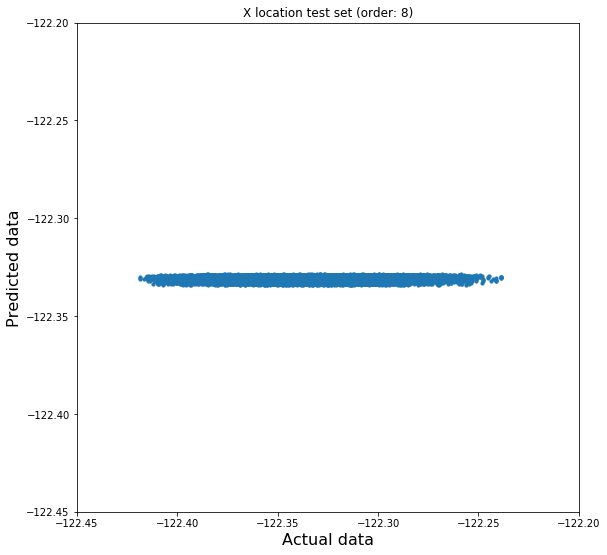

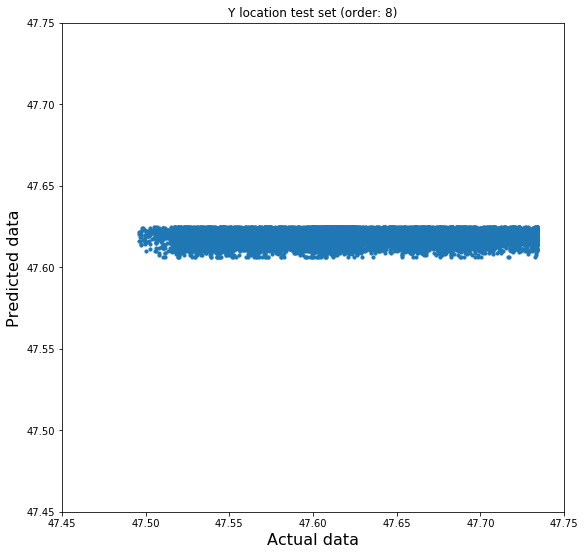

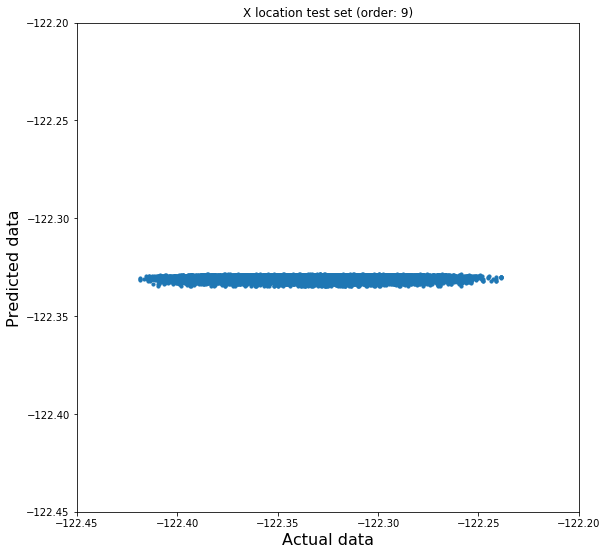

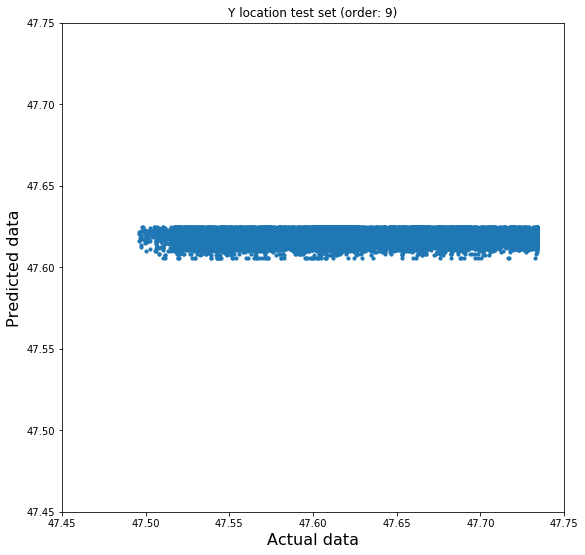

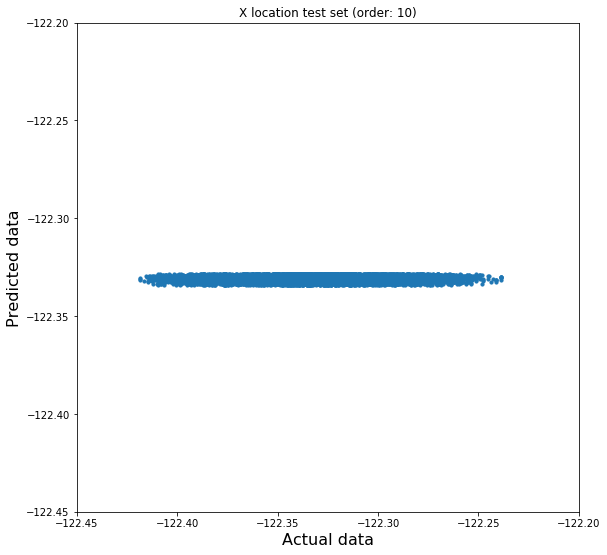

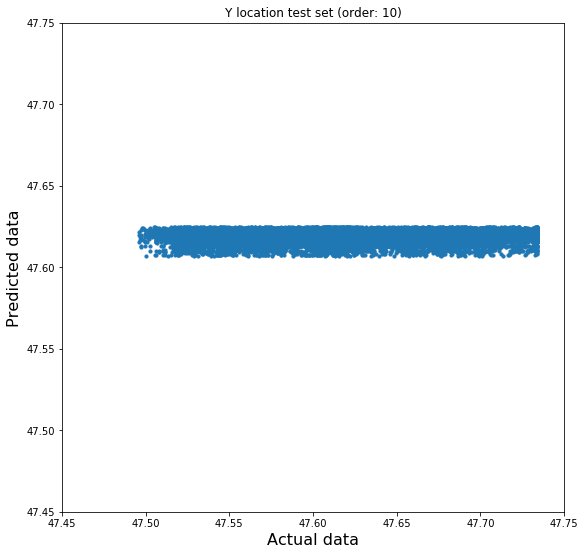

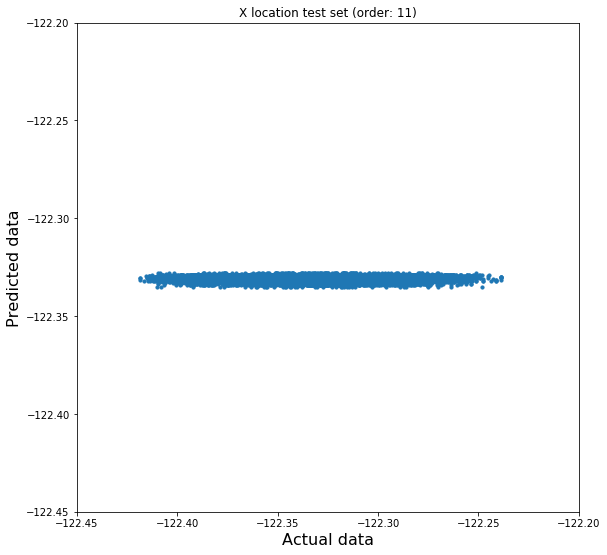

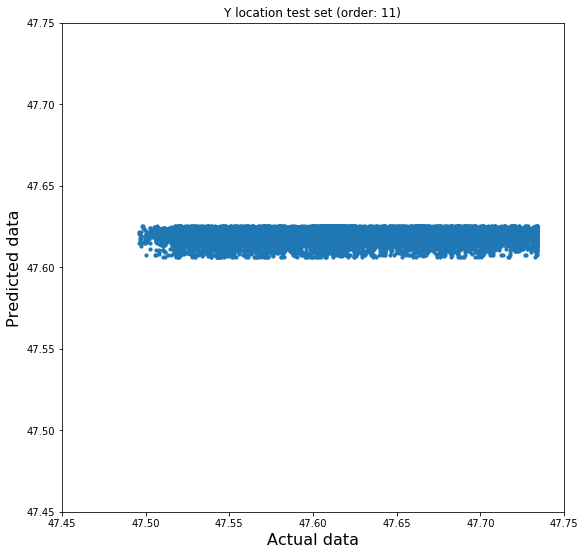

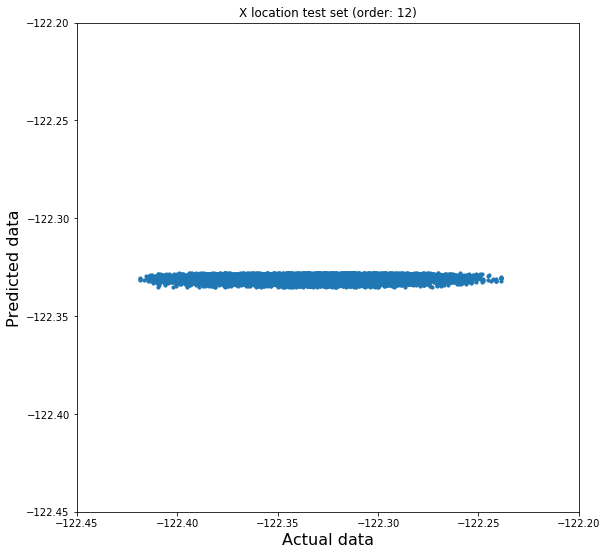

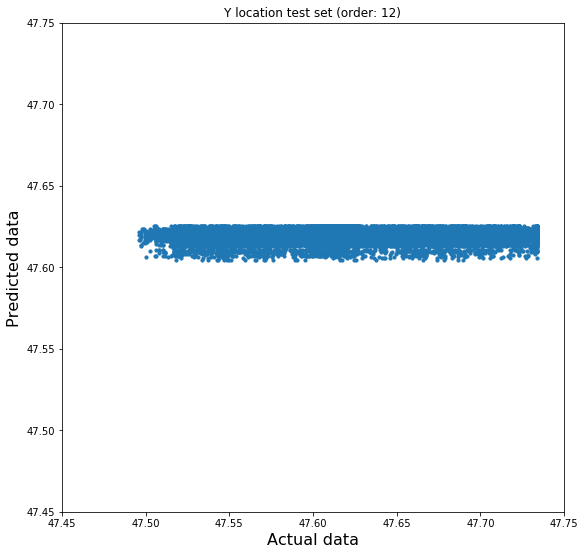

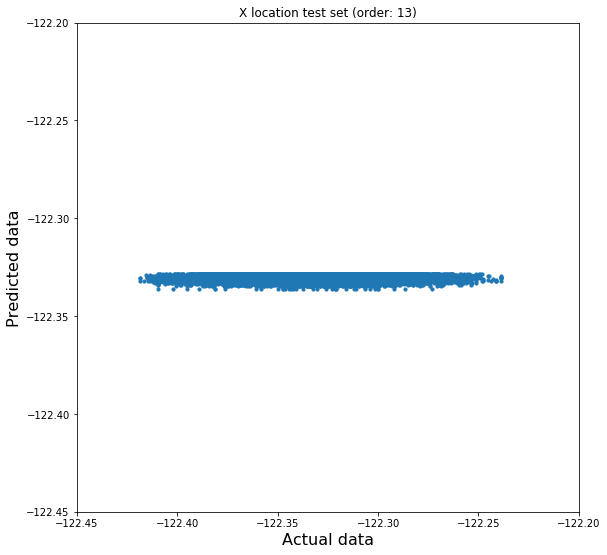

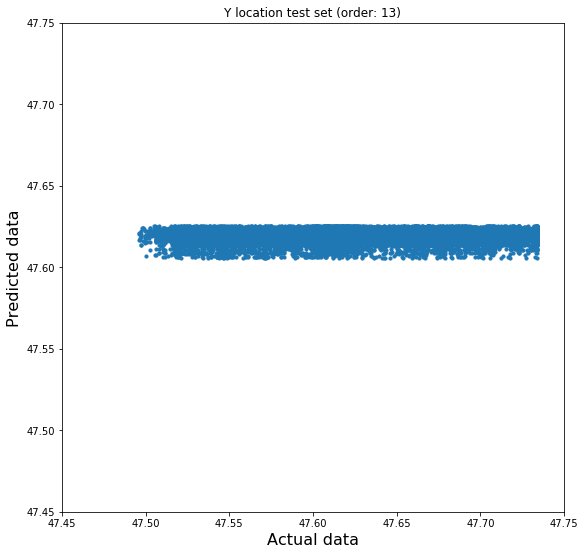

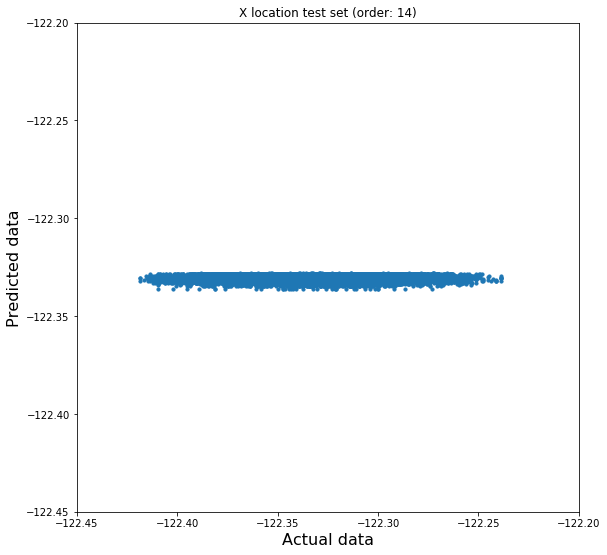

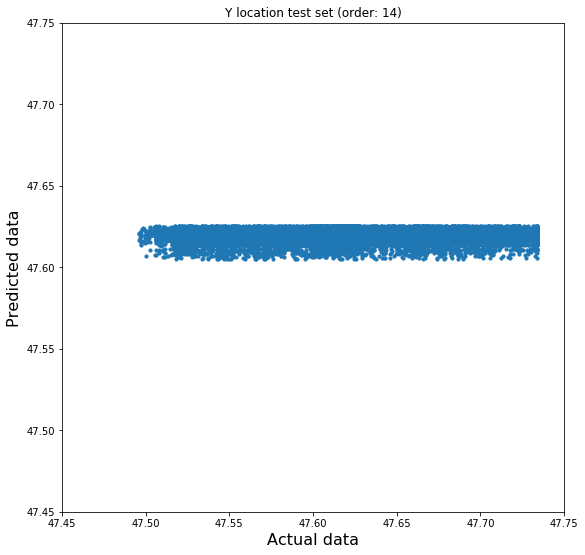

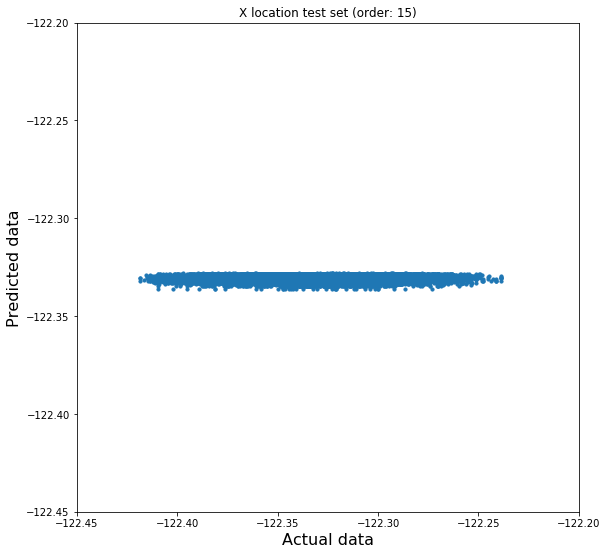

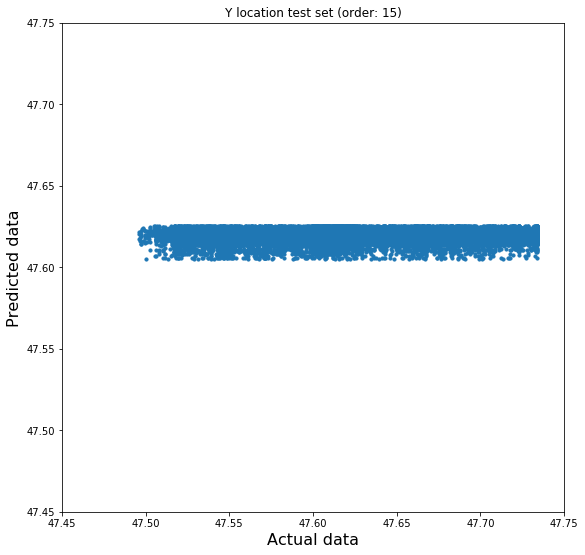

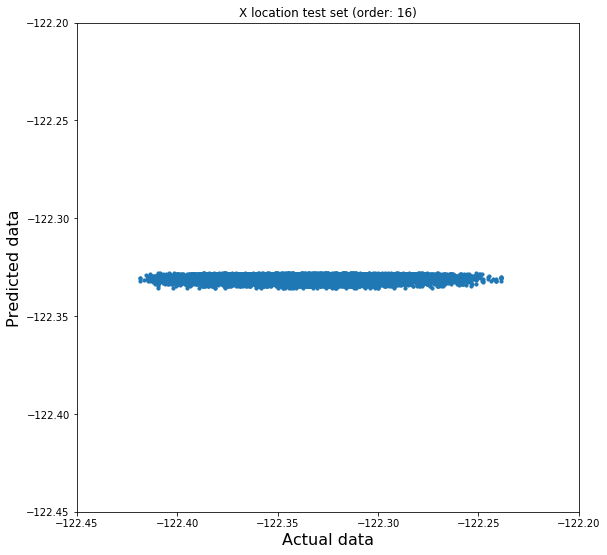

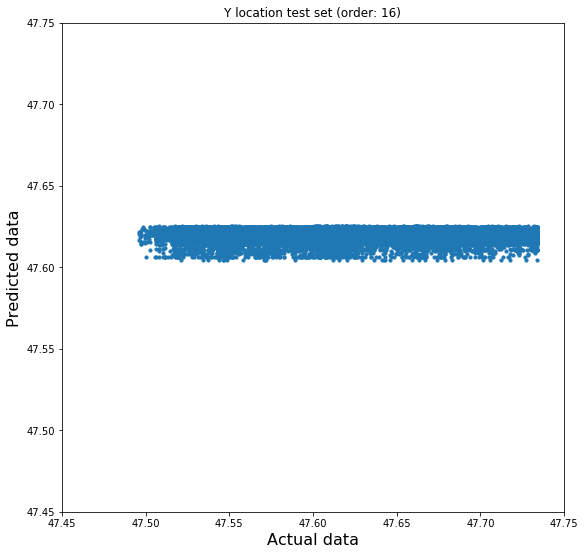

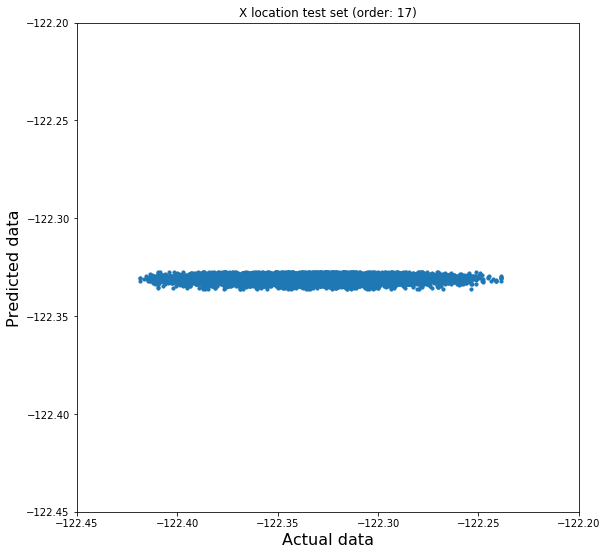

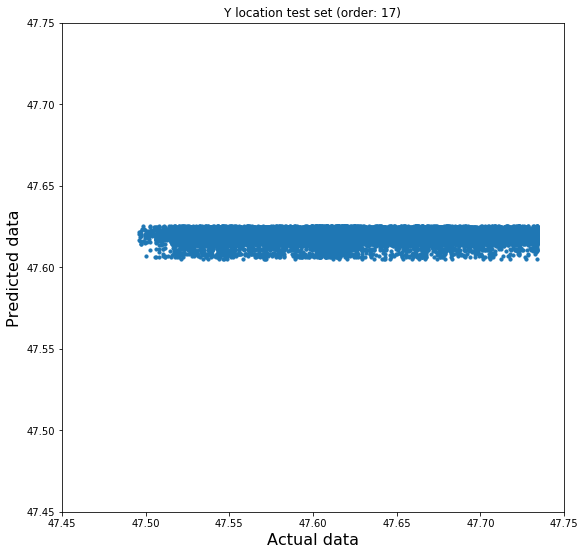

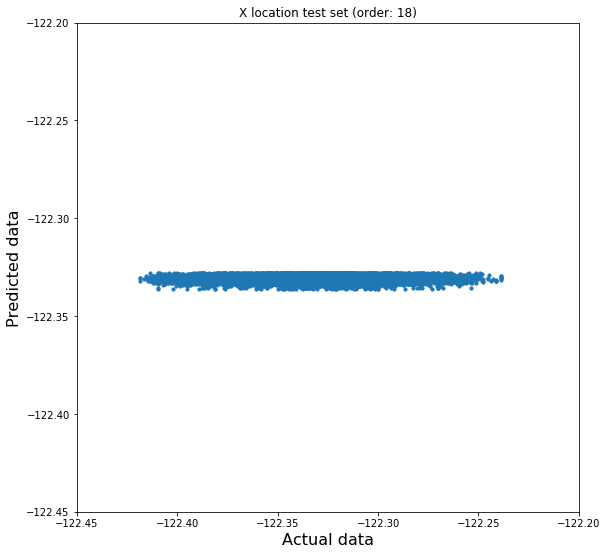

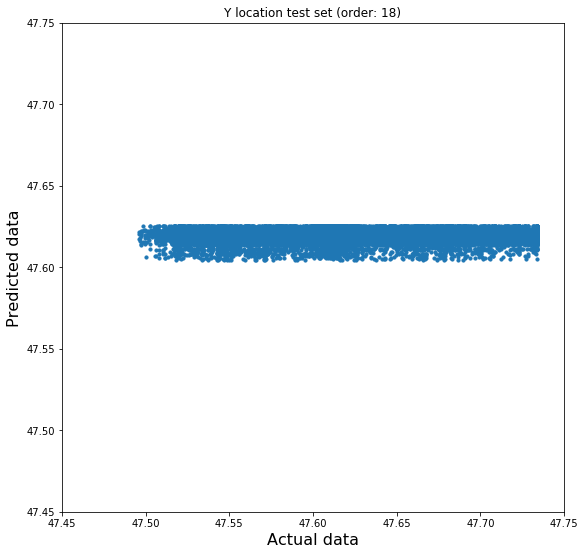

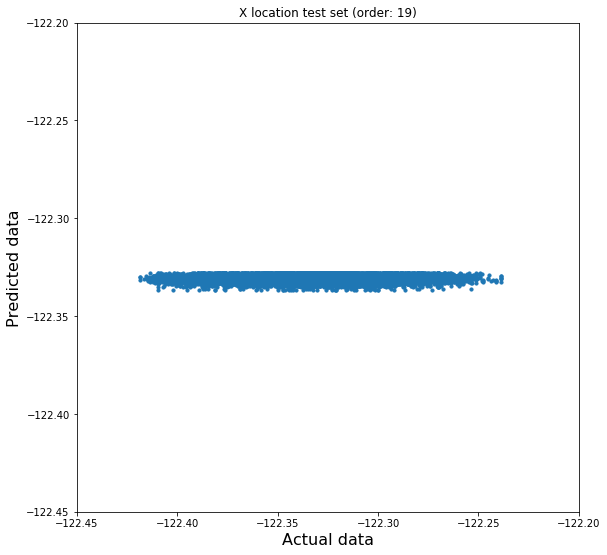

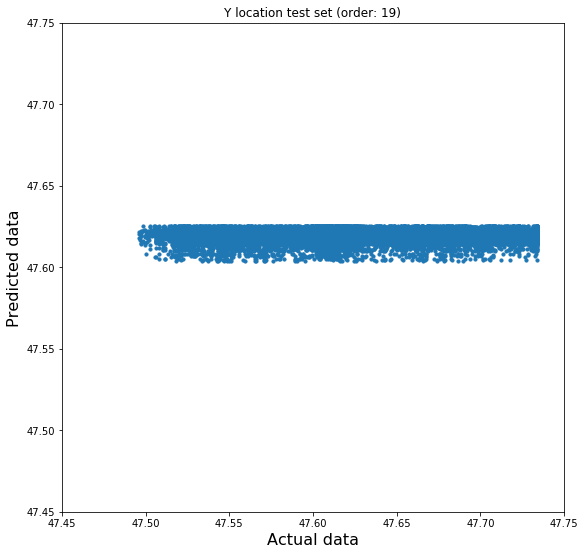

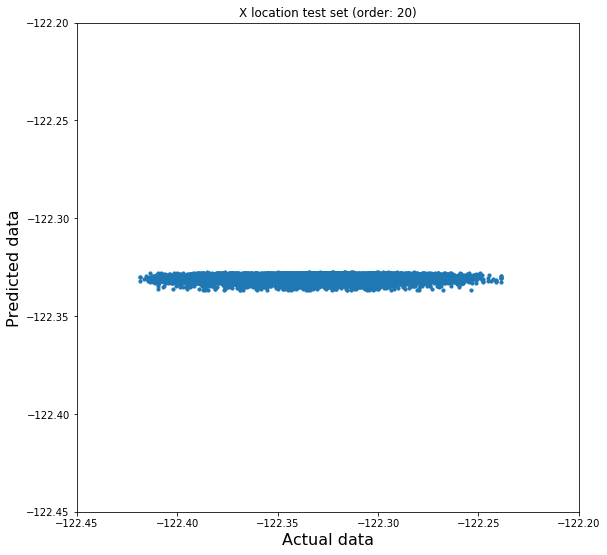

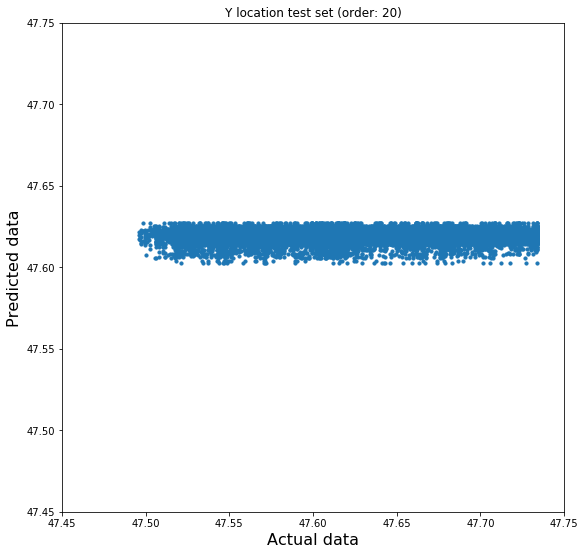

In [59]:
for i in range(4, 21):
    polymodel_i= PolynomialFeatures(degree=i)
    X_train_i = polymodel_i.fit_transform(X_train[:,1:3])
    lin_reg_i = linear_model.LinearRegression()
    lin_reg_i.fit(X_train_i, Y_train[['X','Y']])

    Y_train_pred_i = lin_reg_i.predict(X_train_i)
    X_test_poly_i = polymodel_i.fit_transform(X_test[:,1:3])
    Y_test_pred_i = lin_reg_i.predict(X_test_poly_i)

    Y_test_pred_i = pd.DataFrame(Y_test_pred_i)
    Y_test_pred_i.columns=['X','Y']

    plot_predict_true(Y_test['X'], Y_test_pred_i['X'], "X location test set (order: " + str(i) +")", -122.45,-122.2)
    plot_predict_true(Y_test['Y'], Y_test_pred_i['Y'], "Y location test set (order: " + str(i) +")", 47.45,47.75)